In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
df = pd.read_csv('Offical_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [382]:
df.shape

(25973, 50)

In [383]:
df['Yearly Compensation'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', '0',
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [384]:
Duoi10k = ['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999']

In [385]:
Tu10kden100k = ['10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999']

In [386]:
Tren100k = ['100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-499,999',
 '$500,000-999,999',
 '>$1,000,000']

In [387]:
df['bin'] = df['Yearly Compensation']

In [388]:
df.shape

(25973, 51)

In [389]:
def gomnhom(row):
    if row['Yearly Compensation'] == '0':
        return 'that nghiep'
    if row['Yearly Compensation'] in Duoi10k:
        return 'duoi10k'
    if row['Yearly Compensation'] in Tu10kden100k:
        return '10kto100k'
    if row['Yearly Compensation'] in Tren100k:
        return 'tren100k'

In [390]:
df['bin'] = df.apply(lambda row: gomnhom(row), axis=1)

In [396]:
df[df['bin']=='that nghiep'].to_csv('ThatNghiep.csv')
df[df['bin']=='duoi10k'].to_csv('Duoi10k.csv')
df[df['bin']=='10kto100k'].to_csv('10kto100k.csv')
df[df['bin']=='tren100k'].to_csv('tren100k.csv')

In [399]:
df1 = pd.read_csv('ThatNghiep.csv')
df2 = pd.read_csv('Duoi10k.csv')
df3 = pd.read_csv('10kto100k.csv')
df4 = pd.read_csv('tren100k.csv')

In [401]:
title = ['That nghiep', 'Duoi 10k', 'Tu 10k den  100k', 'Tren 100k']

In [418]:
dff = [df1,df2,df3,df4]

### 1. Age:

Text(0.5, 1.0, 'Tong quan')

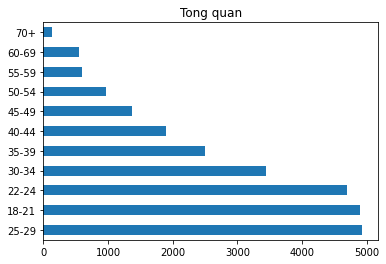

In [411]:
df['Age Range'].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

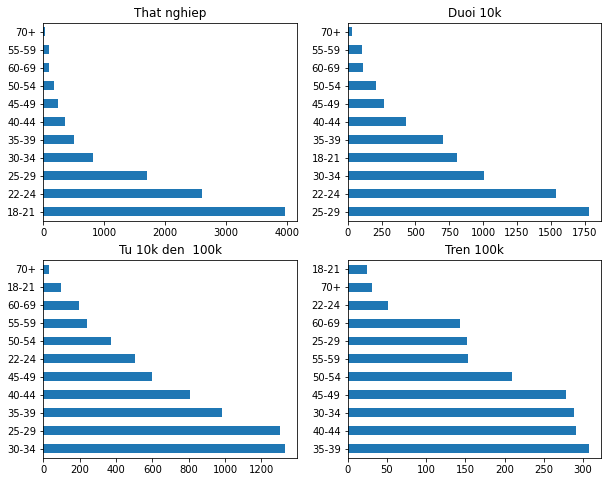

In [407]:
f, axs = plt.subplots(2,2,figsize=(10,8))
for i in range(len(df)):
    plt.subplot(2,2,i+1)
    df[i]['Age Range'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Phần lớn người tham gia khảo sát từ 18 đến 30 tuổi.
+ Độ tuổi chưa có việc làm tập trung vào khoảng từ 18 đến 25 tuổi.
+ Những người đã có việc làm đều từ 25 tuổi trở lên.
+ Những người có thu nhập trên 10000 đô một năm từ 30 tuổi trở lên.
+ Những người có thu nhập trên 100 000 đô một năm khoảng 35 tuổi trở lên.
+ Rất ít người tham gia từ 55 tuổi trở lên.

### 2. Gender:

Text(0.5, 1.0, 'Tong quan')

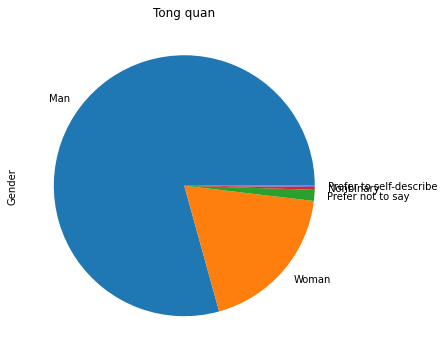

In [414]:
plt.figure(figsize = (8,6))
df['Gender'].value_counts().plot(kind = 'pie')
plt.title('Tong quan')

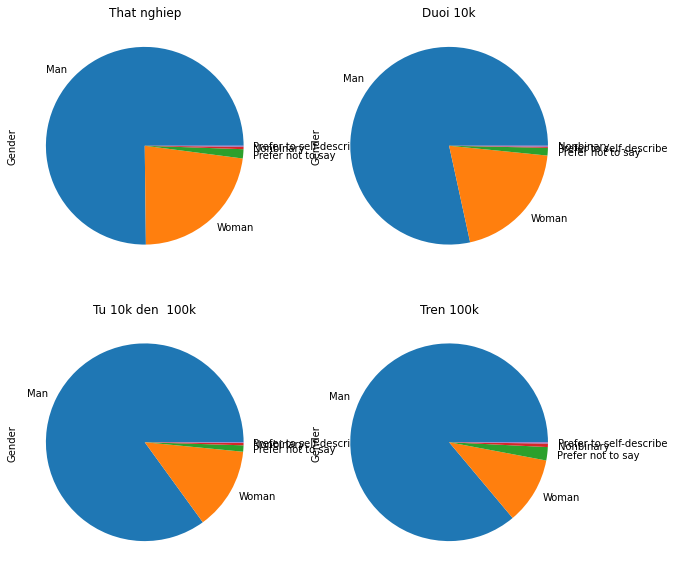

In [422]:
f, axs = plt.subplots(2,2,figsize=(10,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Gender'].value_counts().plot(kind = 'pie')
    plt.title(title[i])

+ Tỉ lệ nam giới trong ngành cao hơn nữ vượt trội.
+ Yếu tố giới tính không ảnh hưởng đến việc có việc làm hoặc mức lương cao hay thấp.

### 3. Country:

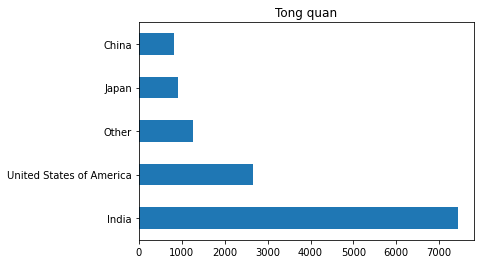

In [423]:
n = 3
df[df.columns[n]].value_counts()[0:5].plot(kind = 'barh')
plt.title('Tong quan')
plt.show()


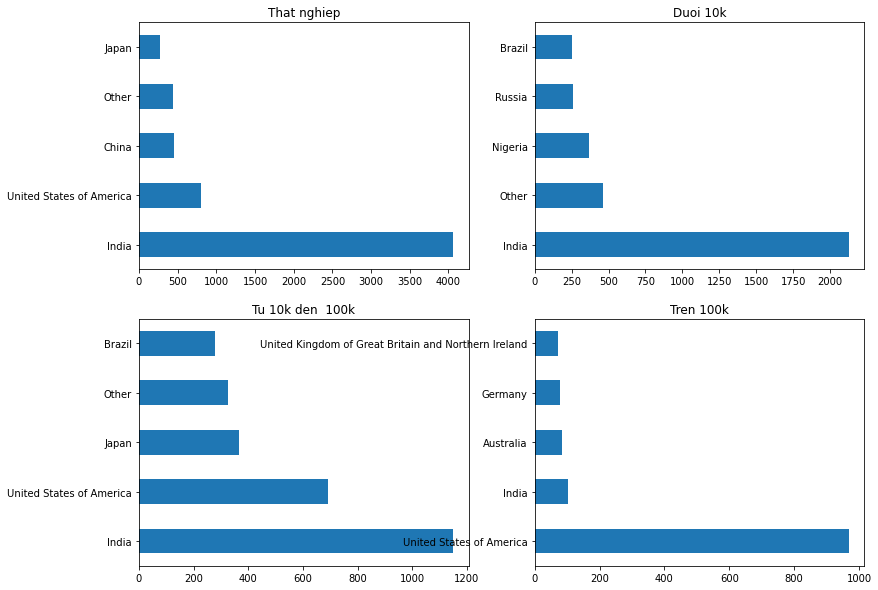

In [426]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Country'].value_counts()[:5].plot(kind = 'barh')
    plt.title(title[i])

+ 2 Quốc gia đứng đầu là Ấn độ và Mỹ, theo sau là nhật bản và trung quốc.
+ Những người có mức lương trên 100k đều từ mỹ. Ngoài ra tỉ lệ có việc ở mỹ cũng cao hơn tỉ lệ thất nghiệp.
+ Mức lương thấp dưới 10k hoặc không có việc làm thì Ấn độ chiếm tỉ trọng nhiều nhất.
+ Mức lương từ 10k đến 100k ngoài Ấn độ và Mỹ thì còn có nhật bản chiếm tỉ trọng cao.


### 4. Education

Text(0.5, 1.0, 'Tong quan')

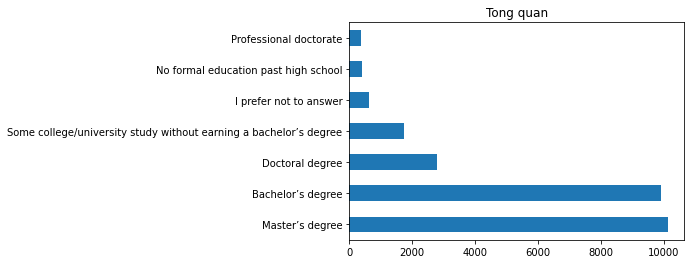

In [429]:
df['Education Level'].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

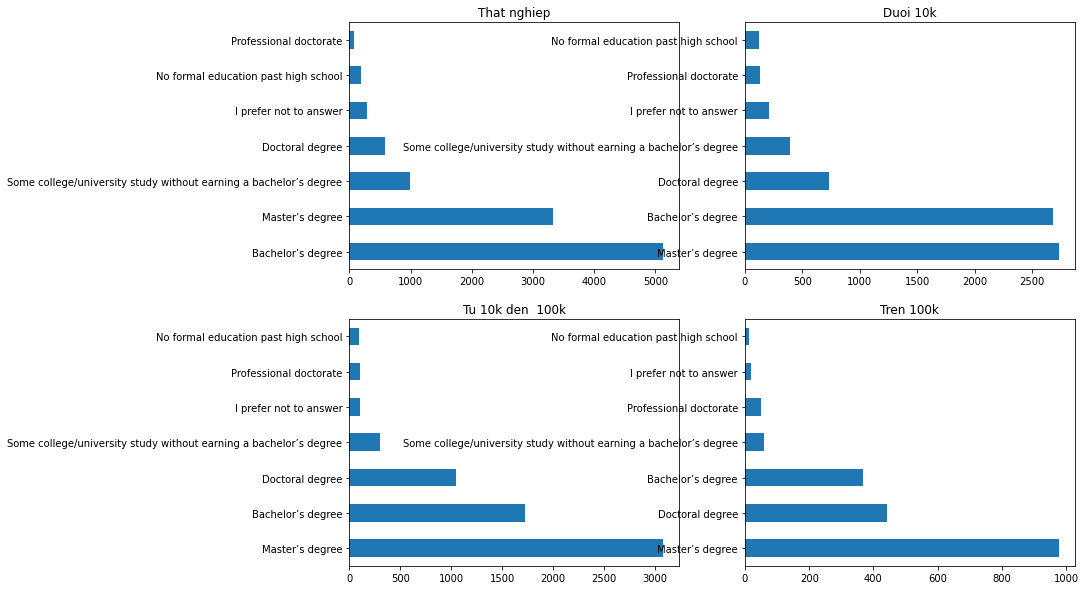

In [435]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Education Level'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Đa số đều có ít nhất là bằng cử nhân hoặc bằng thạc sĩ.
+ Phần lớn người thất nghiệp có bằng cử nhân.
+ Lương càng cao thì thành phần người có bằng thạc sĩ chiếm càng lớn, số lượng bằng cử nhân càng ít đi, số lượng người có bằng tiến sĩ tăng lên.

### 5.Role

Text(0.5, 1.0, 'Tong quan')

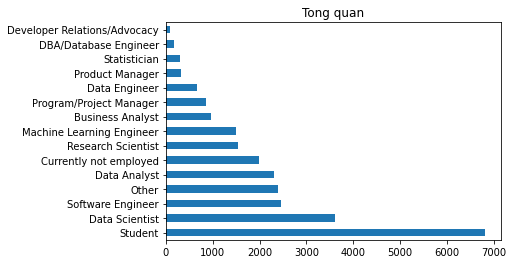

In [436]:
df['Role'].value_counts()[:].plot(kind = 'barh')
plt.title('Tong quan')

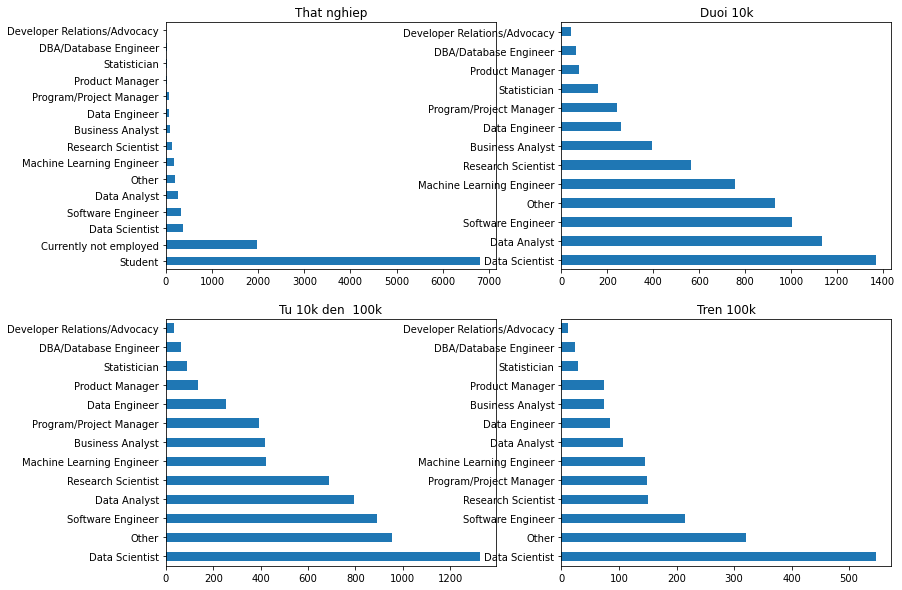

In [437]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Role'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Đa số người tham gia là học sinh, và thường là chưa có việc làm.
+ Công việc data sciencetist chiếm tỉ trọng nhiều nhất ở tất cả các mức lương.
+ Ngoài ra thì dưới 10 000 đô một năm hoặc từ 10000 đến 100000 đô một năm thường thấy ở data analyst và sofware engineer.
+ Trên 100000 đô một năm có software engineer và research scientist chiếm tỉ trọng cao nhất.

### 6. Coding age

Text(0.5, 1.0, 'Tong quan')

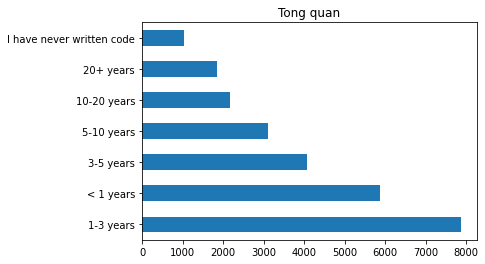

In [438]:
df['Coding age'].value_counts()[:].plot(kind = 'barh')
plt.title('Tong quan')

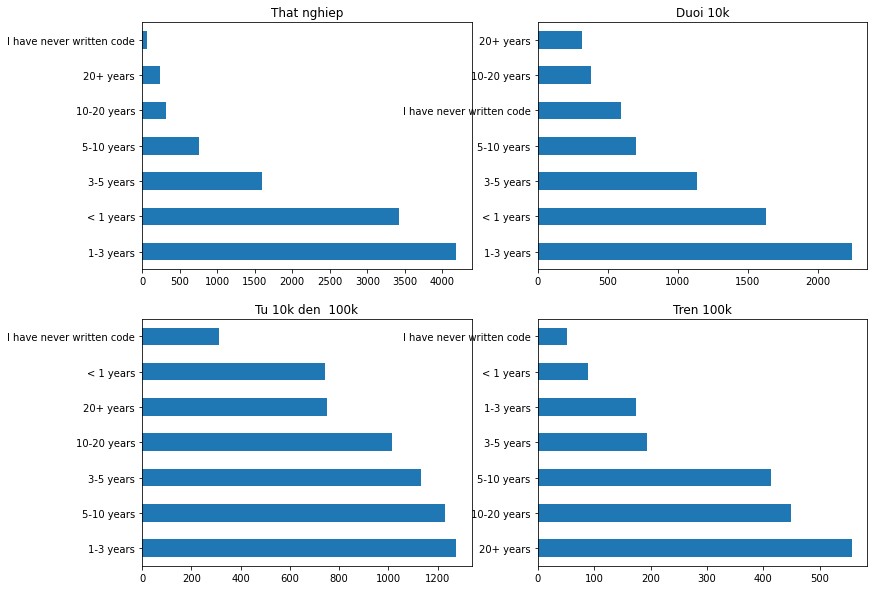

In [440]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Coding age'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Phần lớn người tham gia chỉ có từ 1 đến 3 năm kinh nghiệm coding. 
+ Nhóm người có dưới 1 năm kinh nghiệm coding thì phần lớn là thất nghiệp hoặc lương dưới 10000 đô một năm.
+ Từ mức lương 10000 đến 100000 đô một năm thì ít nhất phải có 1 đến 3 năm kinh nghiệm và tốt nhất là  trên 3 năm kinh nghiệm viết code.
+ Mức lương trên 100k chiếm phần lớn là người từ 5 đến trên 20 năm kinh nghiệm viết code.

### 7.Programming Language:

Text(0.5, 1.0, 'Tong quan')

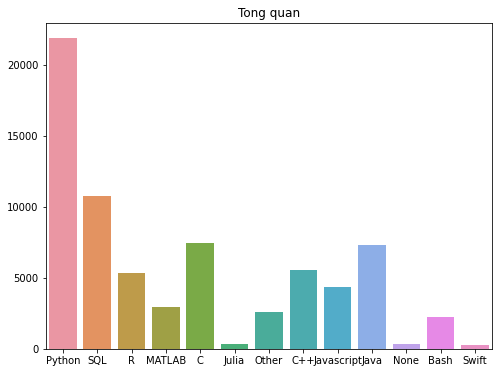

In [455]:
language = ['Python','SQL','R', 'MATLAB','C', 'Julia', 'Other',
 'C++',
 'Javascript',
 'Java',
 'None',
 'Bash',
 'Swift']

count = [0 for i in range(len(language))]
for _ in df['Programming Languages']:
    for i in range(len(language)):
        if language[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(8,6))
sns.barplot(x = language, y = count)
plt.title('Tong quan')

Text(0.5, 1.0, 'Tong quan')

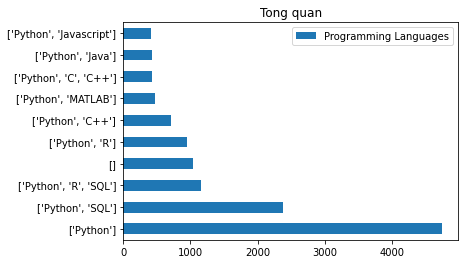

In [454]:
df['Programming Languages'].value_counts().to_frame()[:10].plot(kind = "barh")
plt.title('Tong quan')

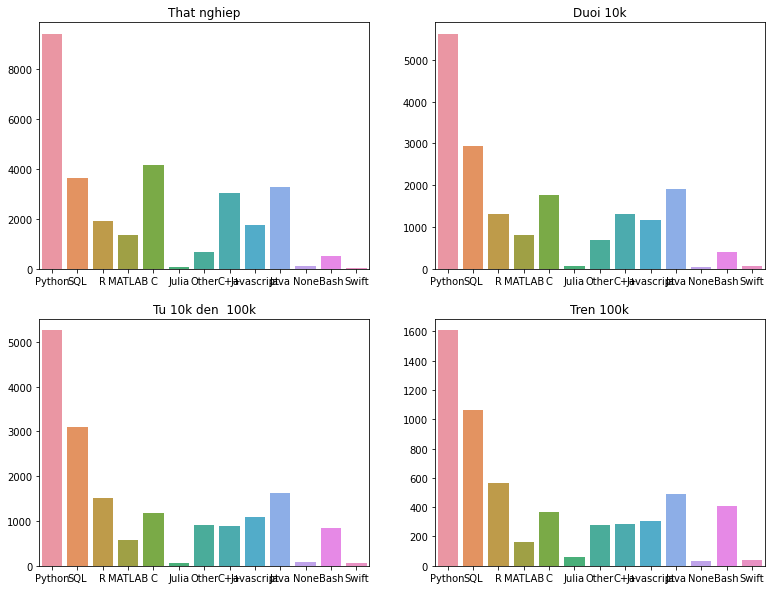

In [451]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(language))]
    for _ in dff[i]['Programming Languages']:
        for ii in range(len(language)):
            if language[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(x = language, y = count)
    plt.title(title[i])

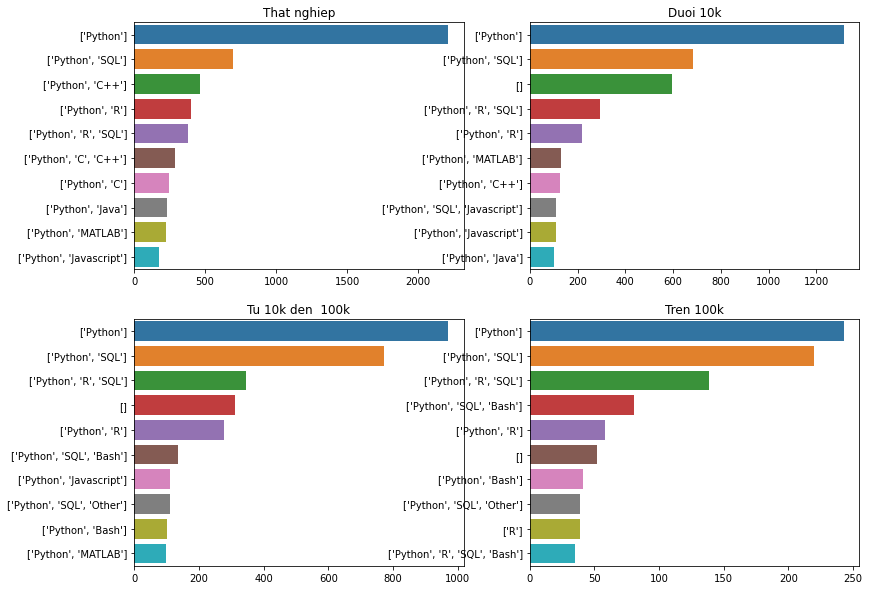

In [505]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Programming Languages'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Programming Languages'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Python là ngôn ngữ được sử dụng nhiều nhất. 
+ Xu hướng ngôn ngữ đều là như nhau. Python, SQL, R, C, C++ và JAVA là những ngôn ngữ sử dụng nhiều.
+ Bộ ba ngôn ngữ được sử dụng nhiều nhất là Python, R , SQL.
+ Ở mức lương 10 000 trở xuống thất nghiệp thì thường thấy xuất hiện C, C++, Java, Javascript, MATLAB.
+ Ở múc lương 10 000 trở lên có sự xuất hiện của Bash.

### 8.IDE:

In [512]:
df.columns[8]

"IDE's"

In [524]:
it = ['Jupyter (JupyterLab, Jupyter Notebooks, etc) ', ' RStudio ', ' Visual Studio ', ' Visual Studio Code (VSCode) ', ' PyCharm ', '  Spyder  ', '  Notepad++  ', '  Sublime Text  ', '  Vim / Emacs  ', ' MATLAB ', ' Jupyter Notebook', 'Other']

Text(0.5, 1.0, 'Tong quan')

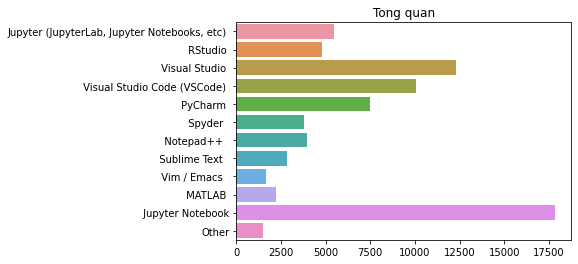

In [529]:
n = 8
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

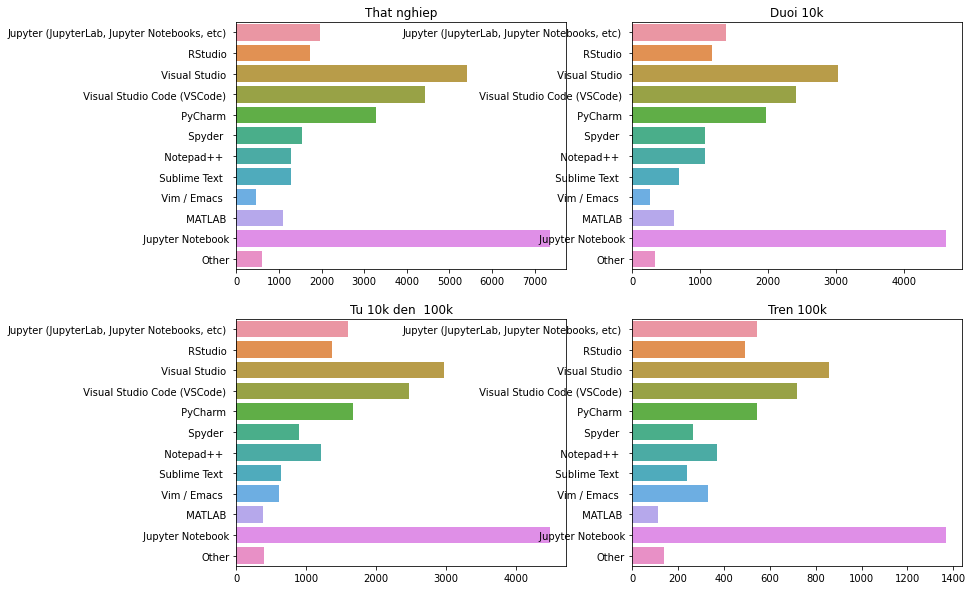

In [528]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i]["IDE's"]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

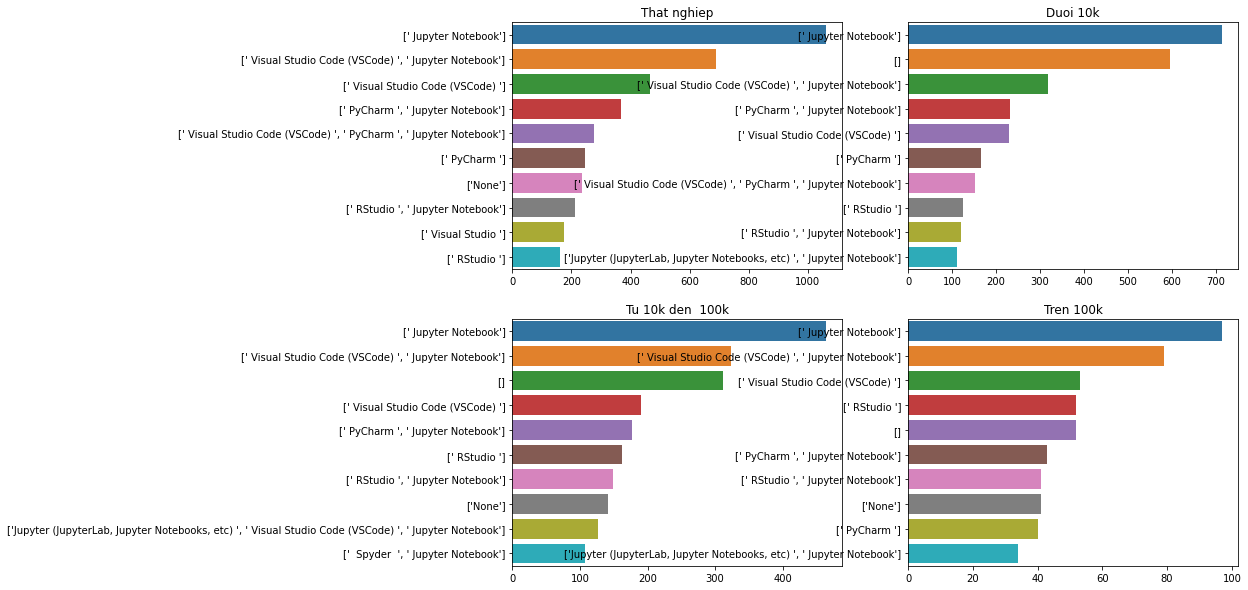

In [513]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]["IDE's"].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]["IDE's"].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Jupyter notebook và visual studio code là hai IDE được sử dụng phổ biến nhất  ở mọi mức thu nhập.

### 9. Recommendation Language:

Text(0.5, 1.0, 'Tong quan')

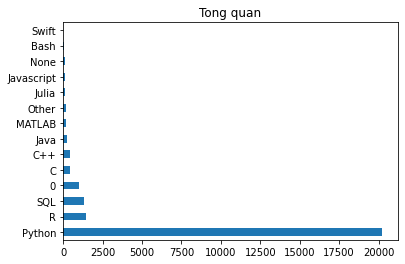

In [514]:
df['Recommendation Language'].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

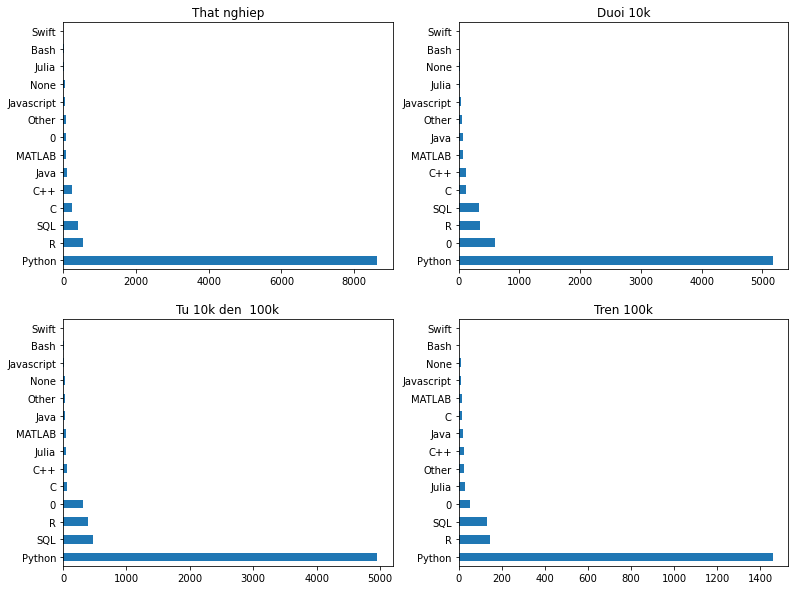

In [515]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Recommendation Language'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Hầu như tất cả đều khuyên học python khi mới bắt đầu vào ngành data scienece.

### 10. Hosted Notebook:

In [519]:
df.columns[10]

'Hosted Notebook'

In [530]:
it = [' Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', ' Paperspace / Gradient ', ' Binder / JupyterHub ', ' Code Ocean ', ' IBM Watson Studio ', ' Amazon Sagemaker Studio Notebooks ', ' Amazon EMR Notebooks ', 'Google Cloud Notebooks (AI Platform / Vertex AI) ', 'Google Cloud Datalab', ' Databricks Collaborative Notebooks ', ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ', ' Observable Notebooks ', 'Other']

Text(0.5, 1.0, 'Tong quan')

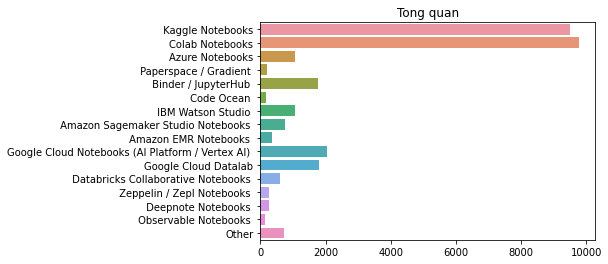

In [518]:
n = 10
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

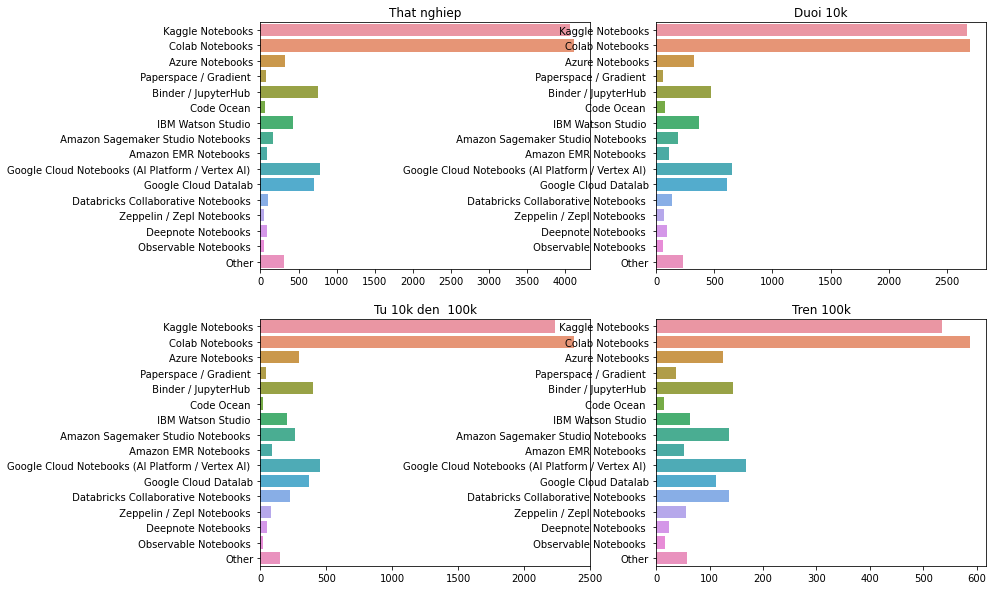

In [531]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i]["Hosted Notebook"]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

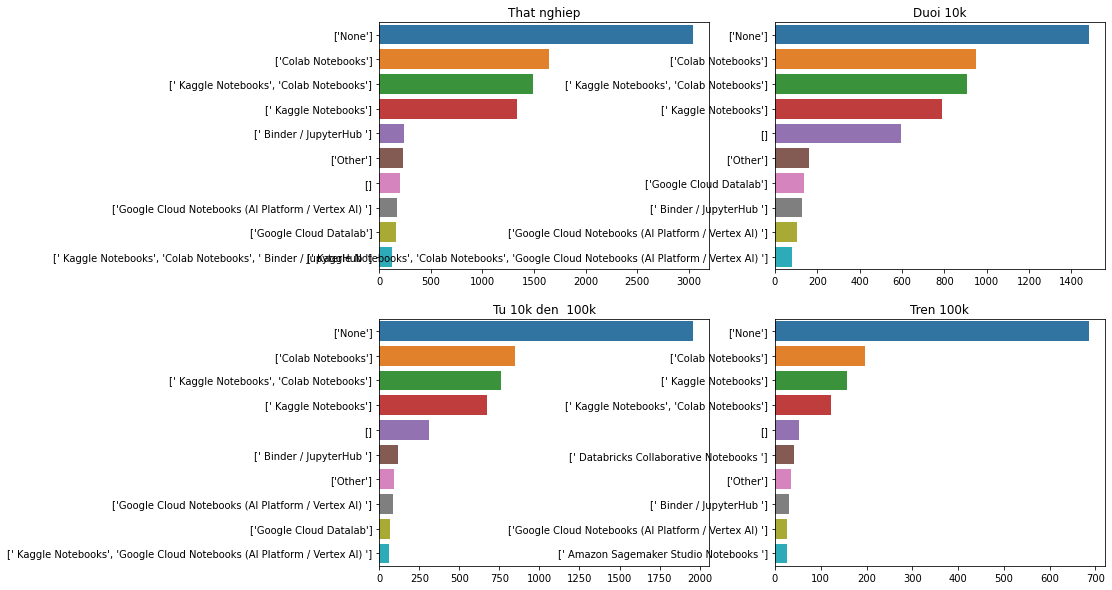

In [521]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]["Hosted Notebook"].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]["Hosted Notebook"].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

### 11. Computing platform :

In [534]:
df.columns[11]

'Computing platform'

Text(0.5, 1.0, 'Tong quan')

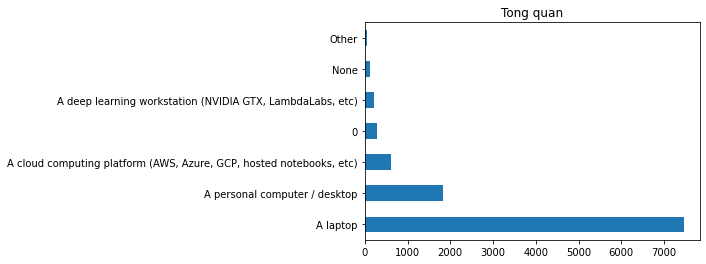

In [532]:
df1[df1.columns[12]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

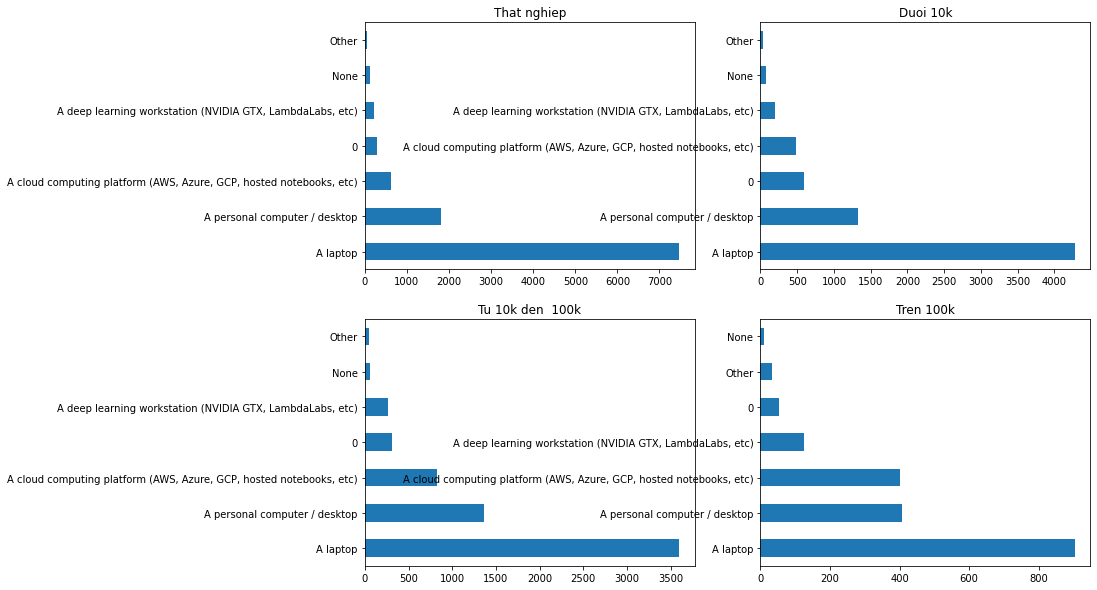

In [535]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Computing platform'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Đa số sử dụng laptop hoặc máy tính để bàn làm nền tảng máy tính chính.
+ Ở các mức lương cao hơn thì người ta còn sử dụng các cloud computing platform (Amazone web service, Azure,...)

### 12. Specialized Hardware:

In [537]:
it = [' NVIDIA GPUs ', ' Google Cloud TPUs ', ' AWS Trainium Chips ', ' AWS Inferentia Chips ', 'Other']

<AxesSubplot:>

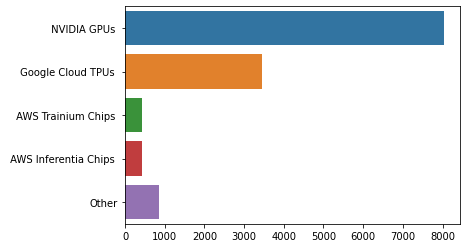

In [539]:
feature = df.columns[12]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")



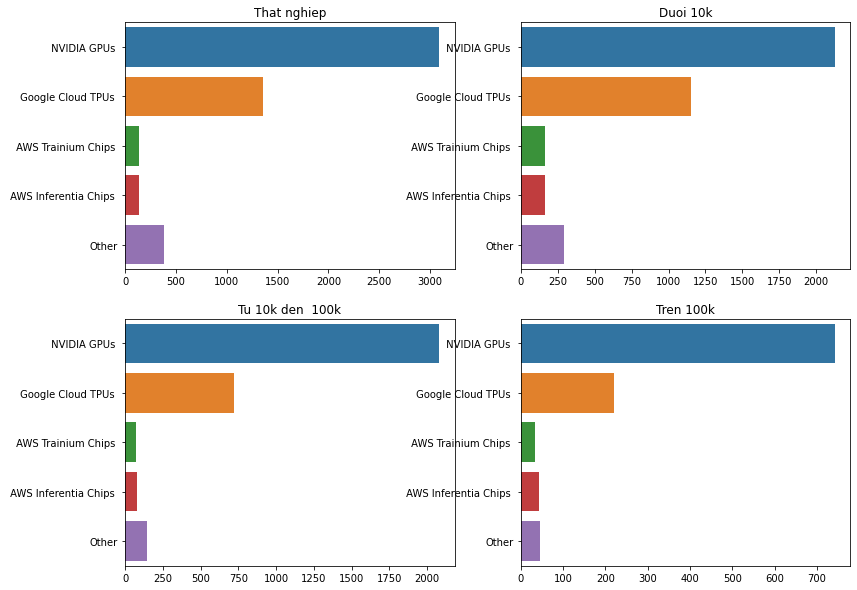

In [540]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[12]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

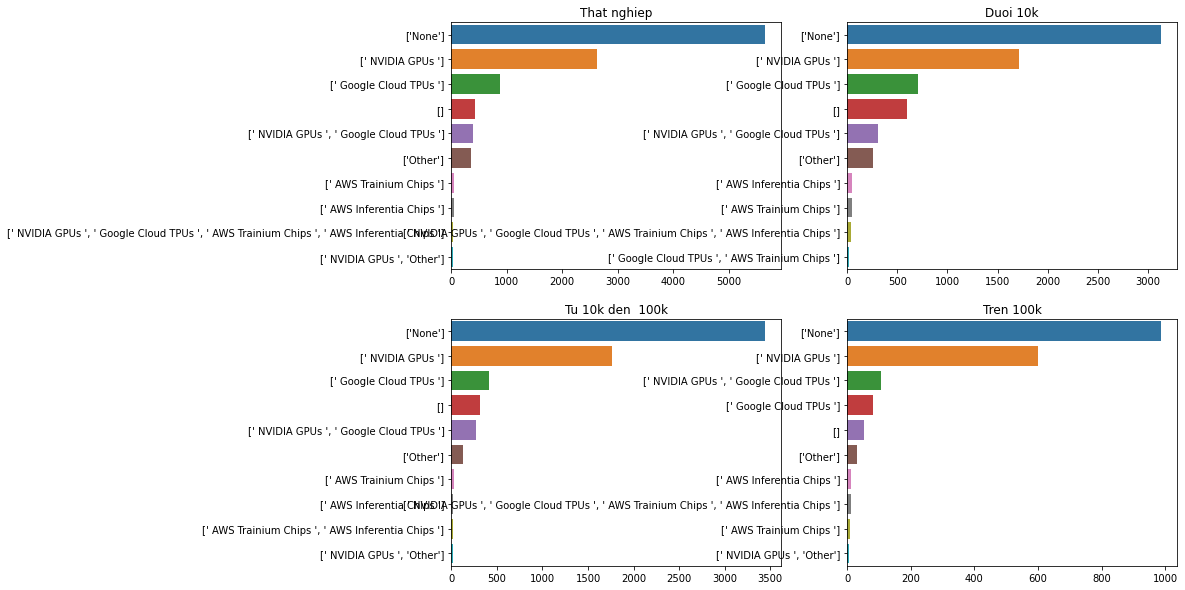

In [542]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Specialized Hardware'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Specialized Hardware'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Đa số đều không sử dụng, nếu có thì NVDIA GPUs được ưa chuộng nhất. Xếp sau đó là google cloud TPUs.

### 13. TPU using times :

In [547]:
df.columns[13]

'TPU using times'

Text(0.5, 1.0, 'Tong quan')

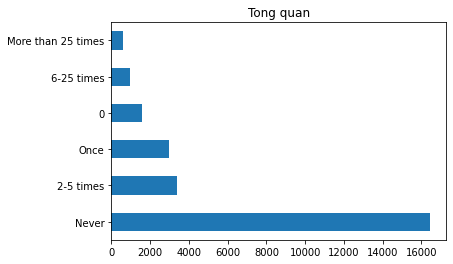

In [546]:
df[df.columns[13]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

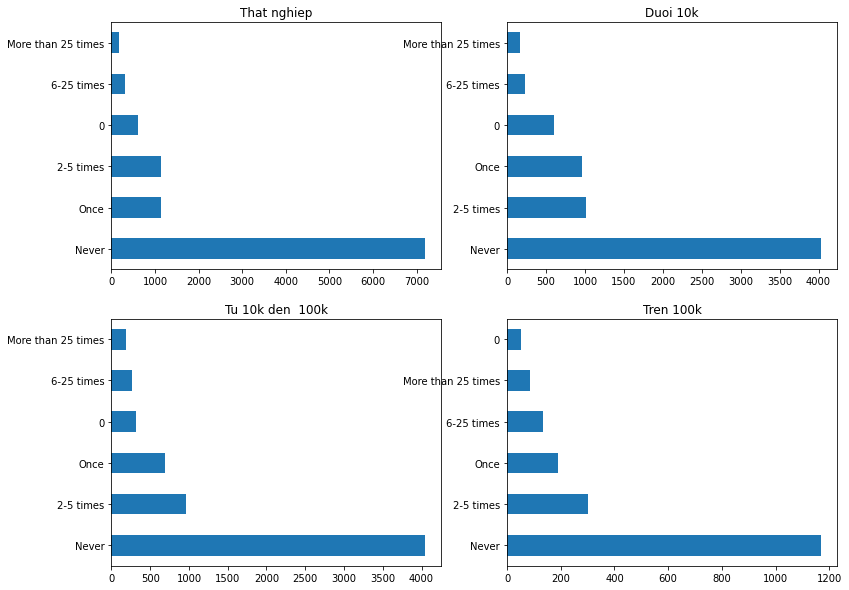

In [548]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['TPU using times'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Đa số đều chưa sử dụng TPU.

### 14. Data visualization libraries:

In [32]:
n = 14
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Matplotlib ', ' Seaborn ', ' Plotly / Plotly Express ', ' Ggplot / ggplot2 ', ' Shiny ', ' D3 js ', ' Altair ', ' Bokeh ', ' Geoplotlib ', ' Leaflet / Folium ', 'Other', 'I do not use machine learning methods']"]

In [549]:
it = [' Matplotlib ', ' Seaborn ', ' Plotly / Plotly Express ', ' Ggplot / ggplot2 ', ' Shiny ', ' D3 js ', ' Altair ', ' Bokeh ', ' Geoplotlib ', ' Leaflet / Folium ', 'Other'] 

Text(0.5, 1.0, 'Tong quan')

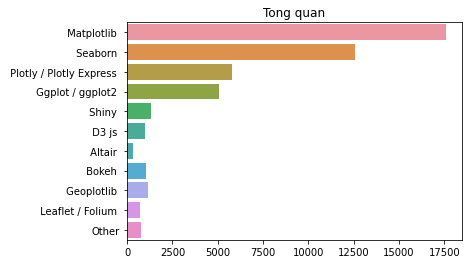

In [550]:
n = 14
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

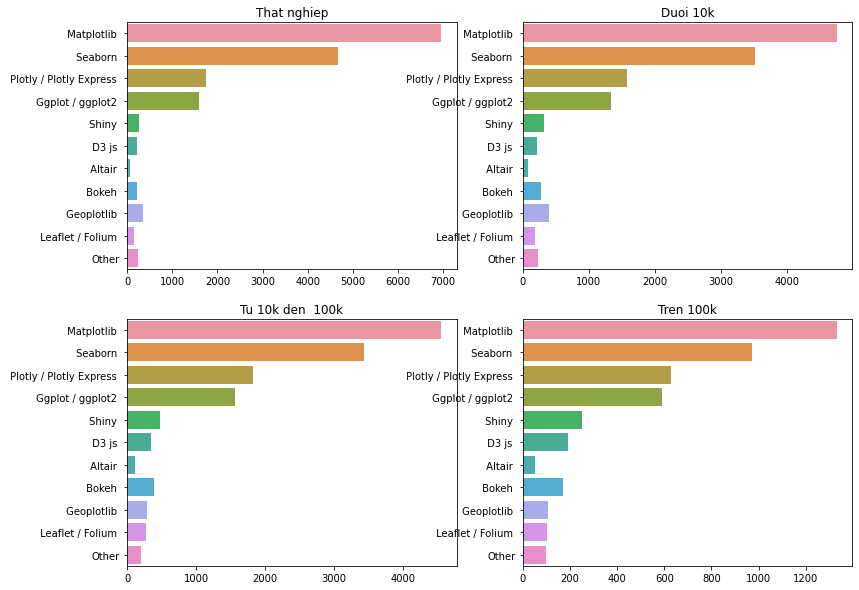

In [551]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[14]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [552]:
df.columns[14]

'Data visualization libraries'

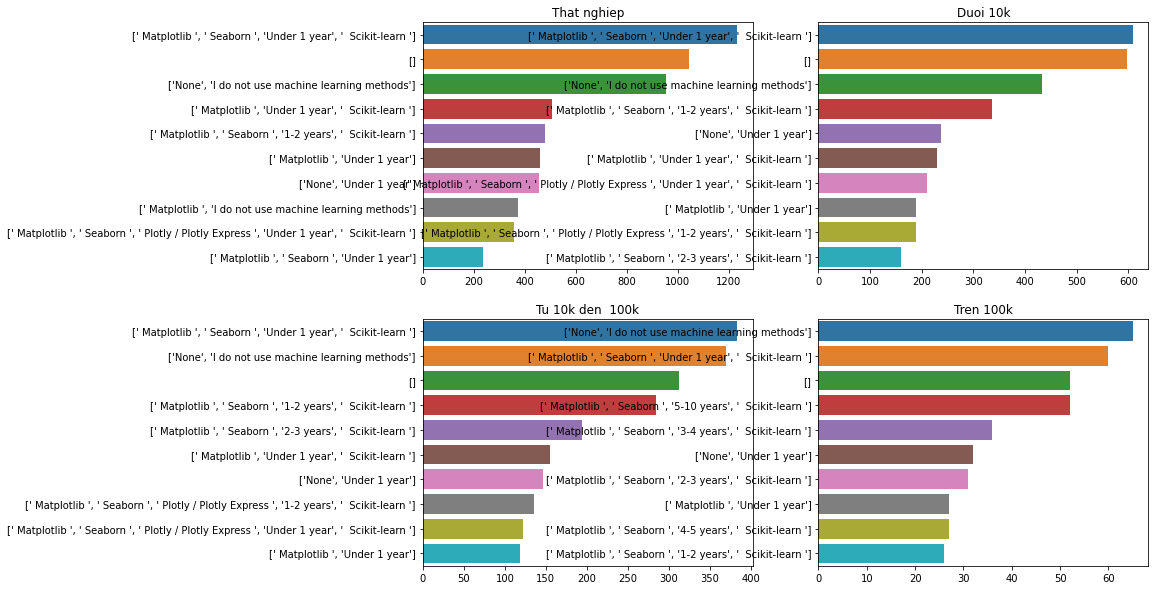

In [554]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Data visualization libraries'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Data visualization libraries'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Matplotlib được sử dụng phổ biến nhất, seaborn và plotty cũng thông dụng.
+ Bộ ba phổ biến nhất là matplotlib, seaborn, scikit-learn.

### 15. Machine Learning Frameworks:

In [37]:
n = 15
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['  TensorFlow ', ' Keras ', ' PyTorch ', ' Fast.ai ', ' MXNet ', ' Xgboost ', ' LightGBM ', ' CatBoost ', ' Prophet ', ' H2O 3 ', ' Caret ', ' Tidymodels ', ' JAX ', ' PyTorch Lightning ', ' Huggingface ', 'Other']"]

In [555]:
it = ['  TensorFlow ', ' Keras ', ' PyTorch ', ' Fast.ai ', ' MXNet ', ' Xgboost ', ' LightGBM ', ' CatBoost ', ' Prophet ', ' H2O 3 ', ' Caret ', ' Tidymodels ', ' JAX ', ' PyTorch Lightning ', ' Huggingface ', 'Other']

Text(0.5, 1.0, 'Tong quan')

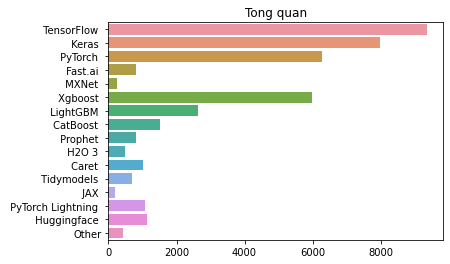

In [556]:
n = 15
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

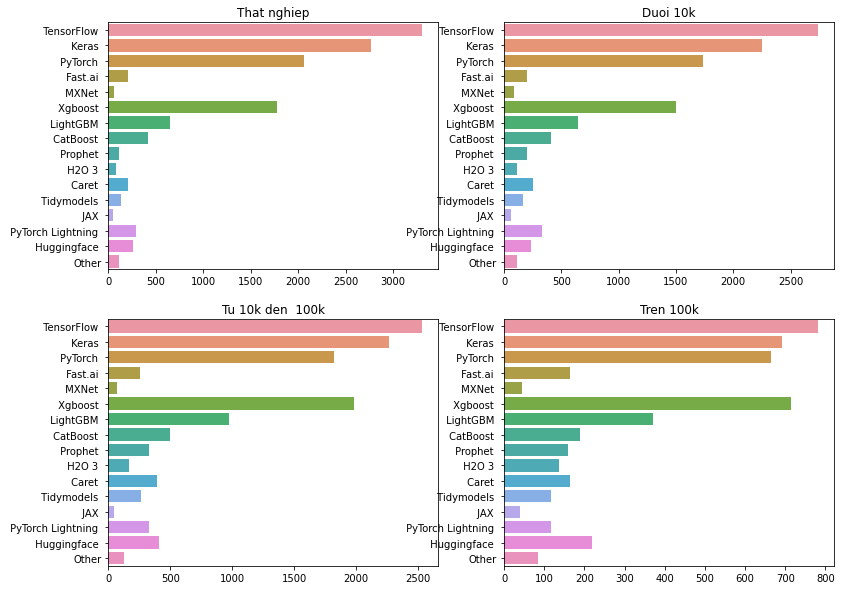

In [557]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[15]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [558]:
df.columns[15]

'Machine Learning Frameworks'

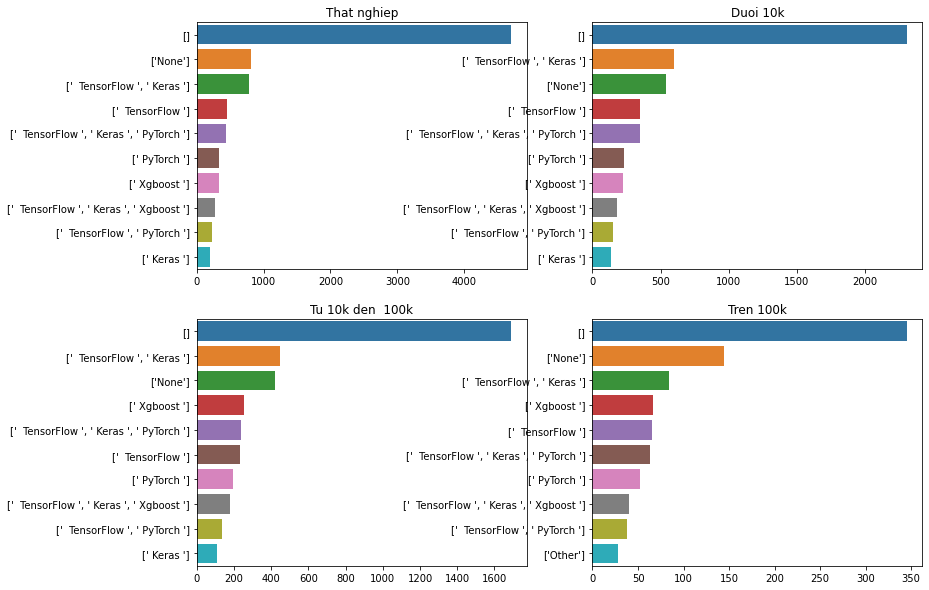

In [559]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Machine Learning Frameworks'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Machine Learning Frameworks'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Đứng đầu là tensorflow, theo sau đó là keras, pytorch và xgboost.
+ Xu hướng giống nhau ở mọi mức lương.

### 16. ML algorithms:

In [153]:
n = 16
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'Other']"]

In [570]:
it = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'Other']

Text(0.5, 1.0, 'Tong quan')

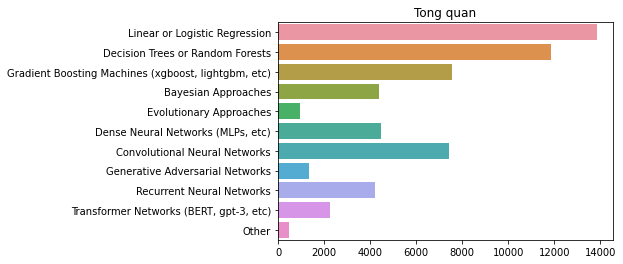

In [571]:
n = 16
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

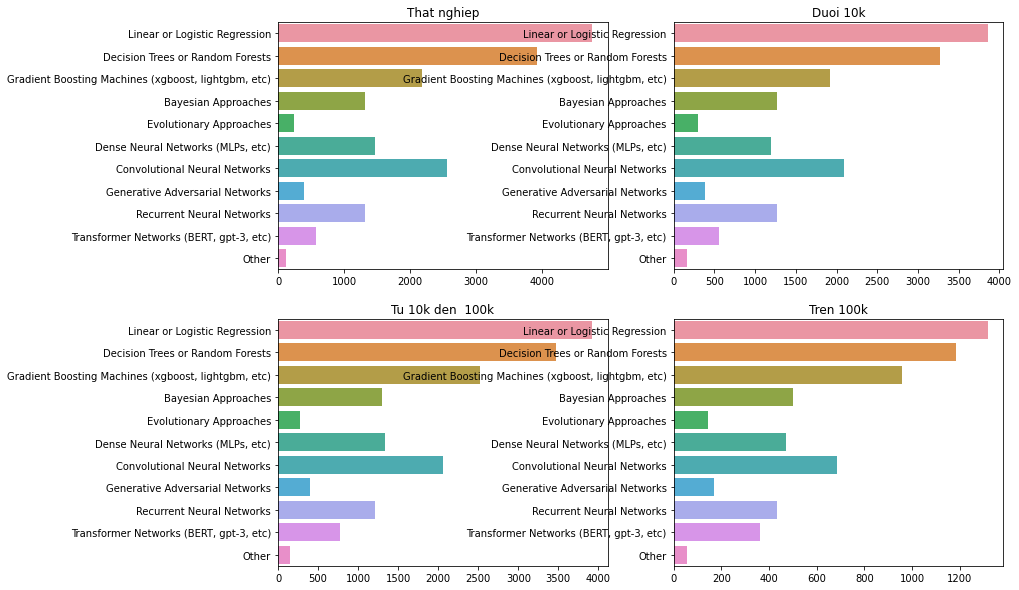

In [572]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[16]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [563]:
df.columns[16]

'ML algorithms'

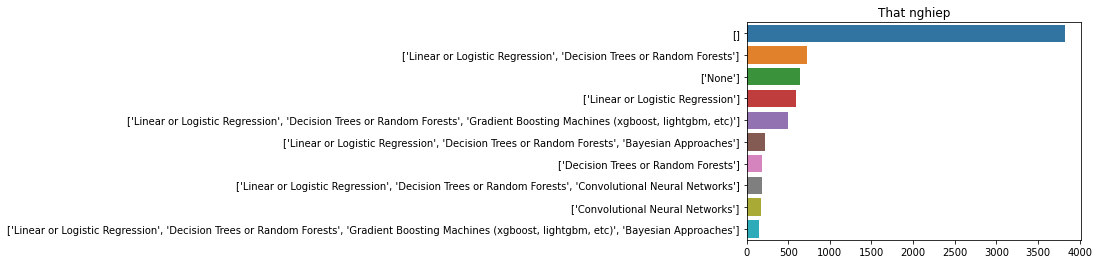

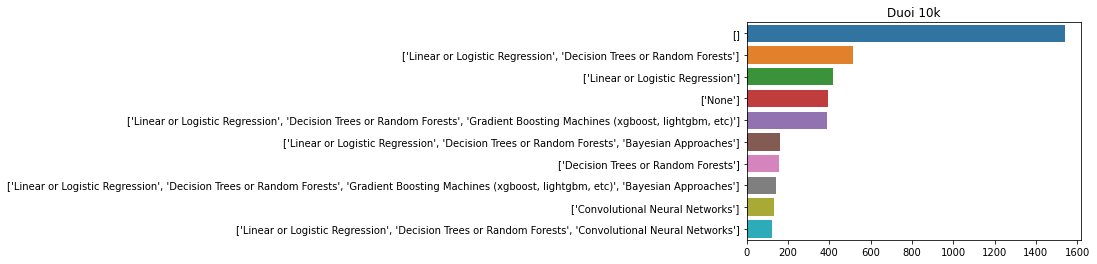

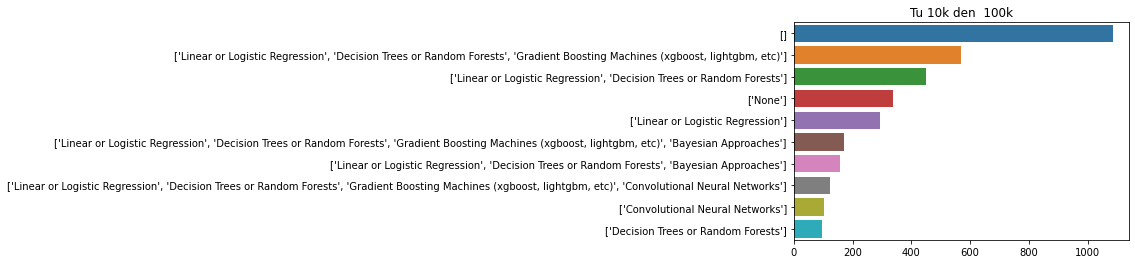

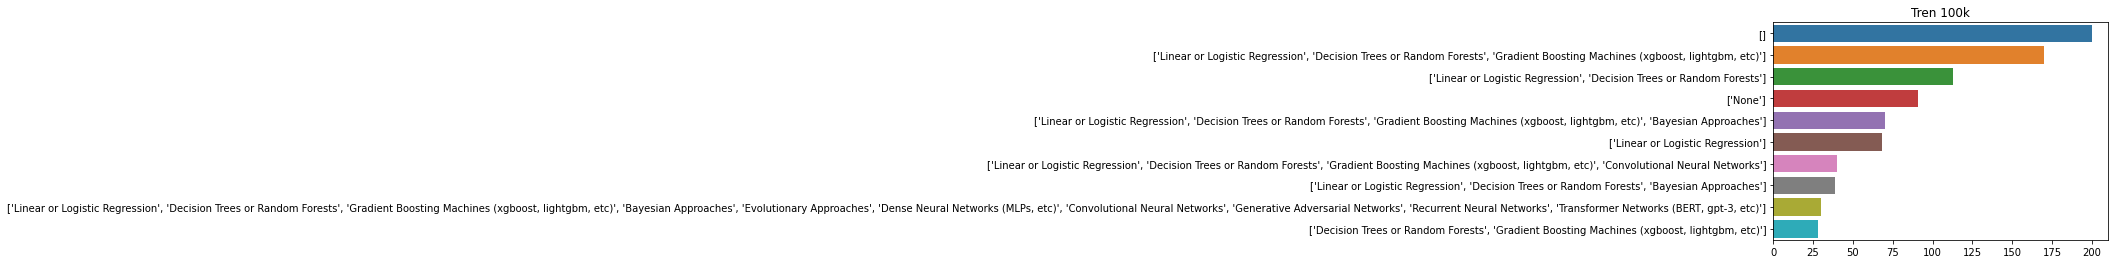

In [565]:
for i in range(len(dff)):
    Y = dff[i]['ML algorithms'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['ML algorithms'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])
    plt.show()

+ Đứng đầu là linear, logistic regression, decision tree, random forest.
+ Ở mức thu nhập thấp thì thường dùng linear/ logistic regression và decision tree hoặc random forest
+ Ở mức thu nhập cao Gradient boosting machine (xgboost, lightgbm) được sử dụng nhiều hơn.

### 17. Computer Vision Methods:

In [236]:
n = 17
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)', 'Object detection methods (YOLOv3, RetinaNet, etc)', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)', 'Generative Networks (GAN, VAE, etc)', 'Other']"]

In [573]:
it = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)', 'Object detection methods (YOLOv3, RetinaNet, etc)', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)', 'Generative Networks (GAN, VAE, etc)', 'Other']

Text(0.5, 1.0, 'Tong quan')

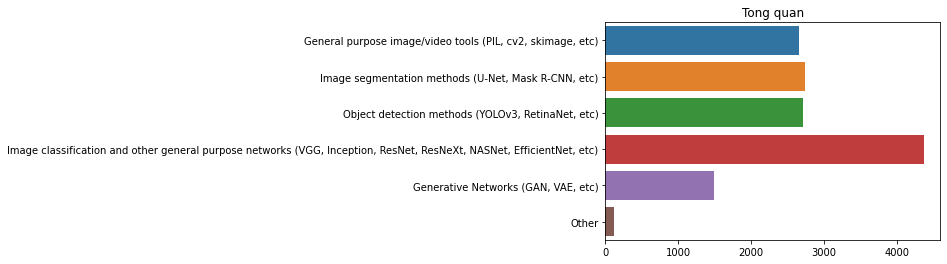

In [568]:
n = 17
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

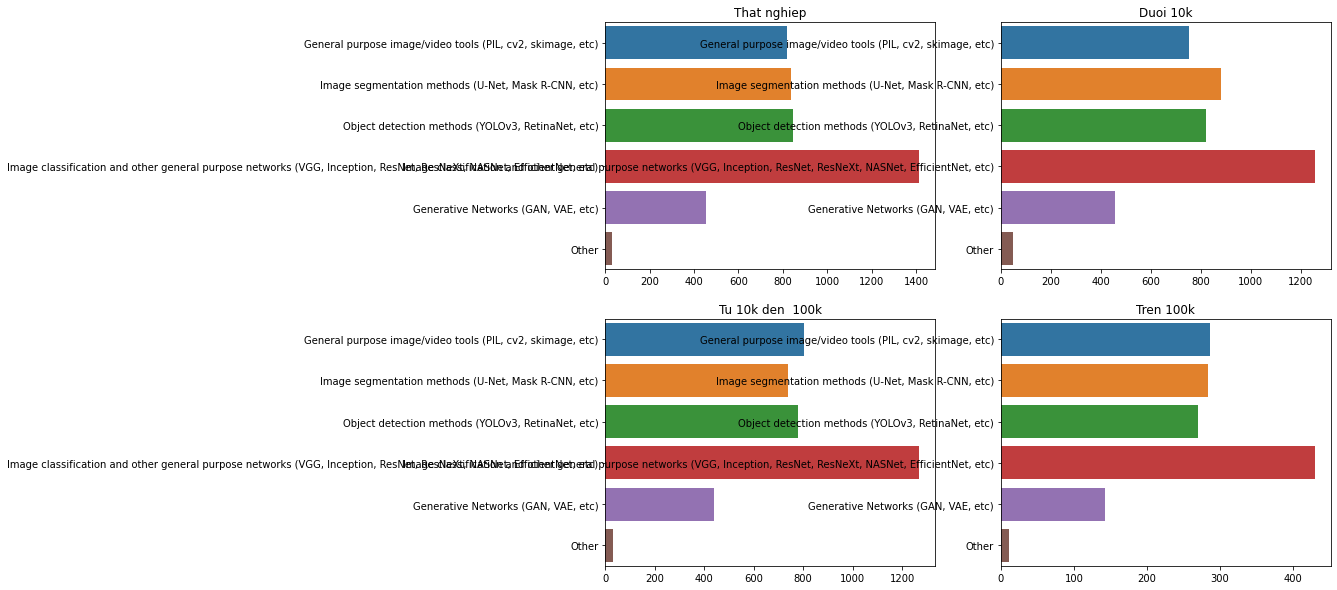

In [574]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[17]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [575]:
df.columns[17]

'Computer Vision Methods'

+ Phổ biến nhất là Image classification.
+ Tuy nhiên các tác vụ khác như object detection, image segmentation, general purpose image/video tools cũng có số lượng không ít.

### 18. NLP methods:

In [243]:
n = 18
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Encoder-decorder models (seq2seq, vanilla transformers)', 'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)', 'Other']"]

In [582]:
it = ['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Encoder-decorder models (seq2seq, vanilla transformers)', 'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)', 'Other']

Text(0.5, 1.0, 'Tong quan')

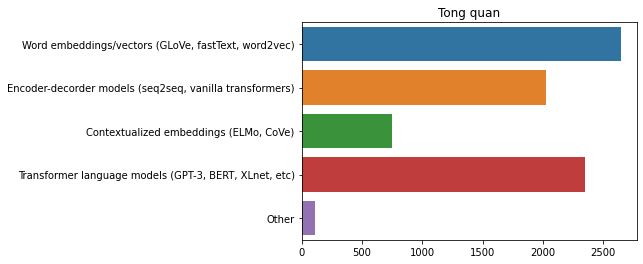

In [580]:
n = 18
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

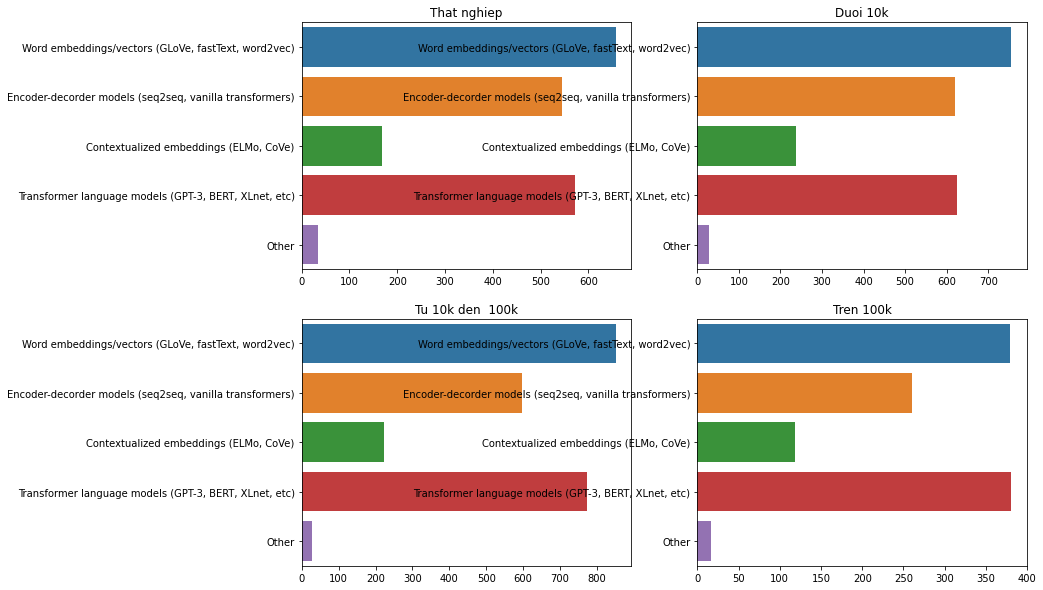

In [584]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[18]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ Những phương pháp NLP được sử dụng phổ biến nhất là các phương pháp Word embedding (Glove, word2vec,..) và các mô hình ngôn ngữ Transformer ( Bert, GPT-3, ..vv), các mô hình encoder-decoder (seq2sed,...)

### 19. Industry:

Text(0.5, 1.0, 'Tong quan')

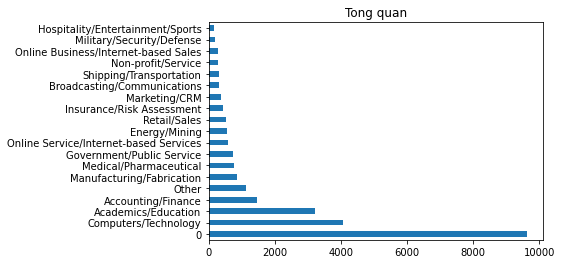

In [586]:
plt.figure(figsize = (6,4))
df[df.columns[19]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

In [587]:
df.columns[19]

'Current Industry'

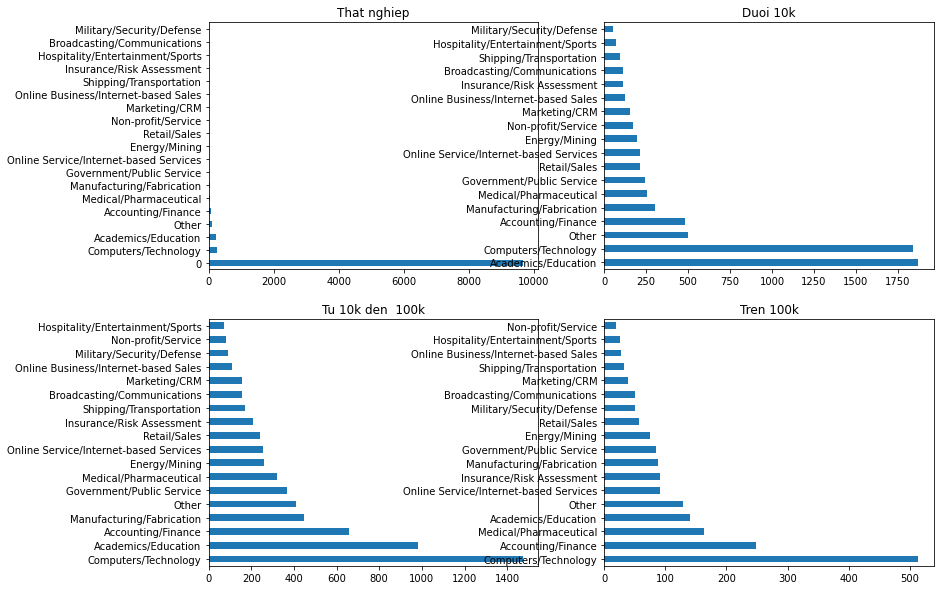

In [588]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Current Industry'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Chủ yếu là doanh nghiệp thuộc ngành Computer/Technology
+ Ở mức lương dưới 10 000 nhiều người trong ngành Academic/Education. Nhóm Academic/Education giảm đi khi lên mức lương cao hơn, thay vào đó là Accounting/Finace, Medical/Pharmaceutical.

### 20. Size of the company:

In [591]:
df.columns[20]

'Size of the company'

Text(0.5, 1.0, 'Tong quan')

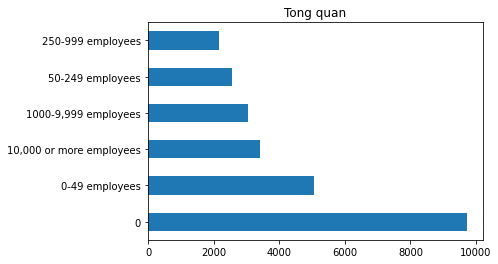

In [589]:
df[df.columns[20]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

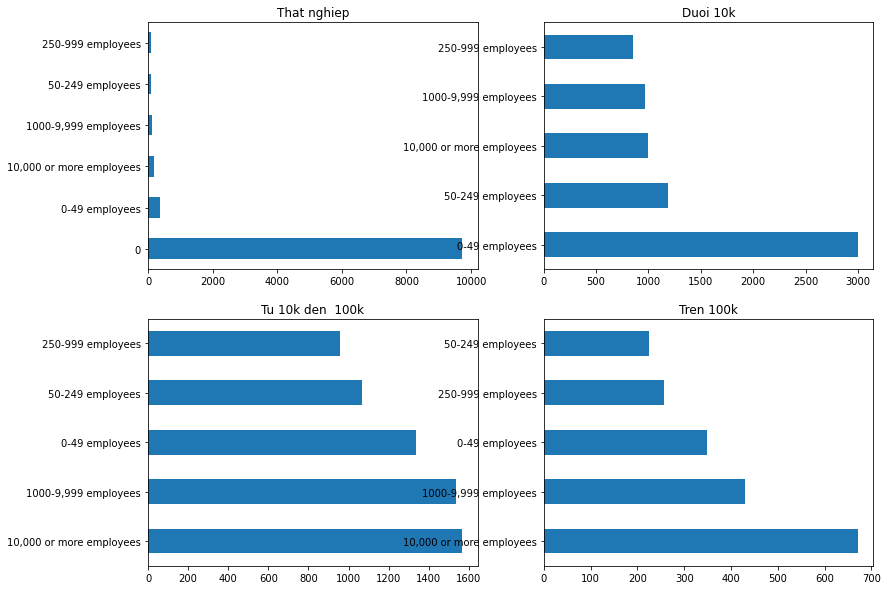

In [592]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Size of the company'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Những công ty có quy mô khoảng 50 nhân viên trở xuống thường trả lương dưới 10000 đô một năm.
+ Những công ty có quy mô khoảng 1000 nhân viên tới trên 10000 nhân viên thì mới trả trên 10000 đô một năm.

### 21. Number of individuals are responsible for data science in company:

Text(0.5, 1.0, 'Tong quan')

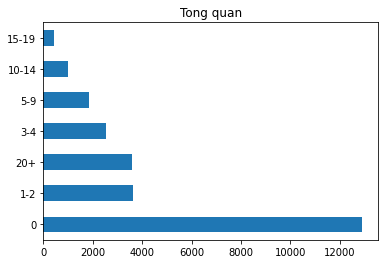

In [593]:
df[df.columns[21]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

In [596]:
df.columns[21]

'Number of individuals are responsible for data science in company'

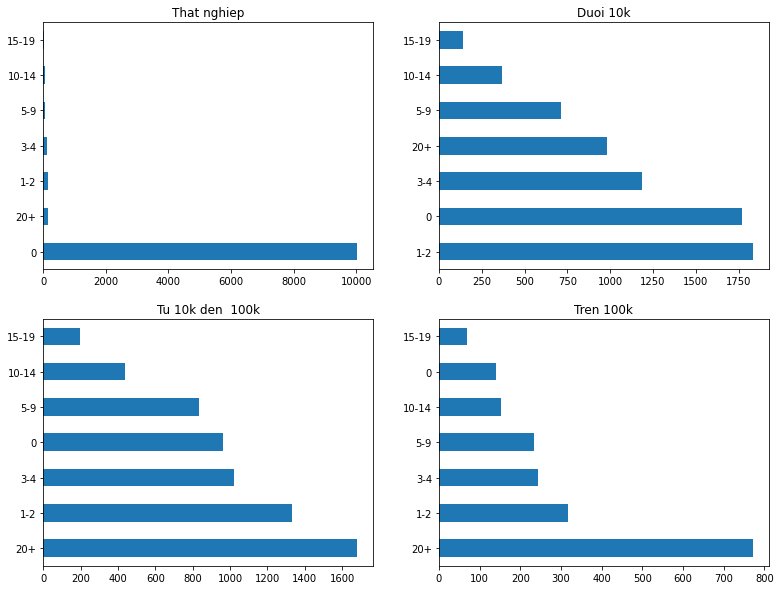

In [597]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Number of individuals are responsible for data science in company'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Với mỗi công ty hoặc thường là team nhỏ từ 1 đến 2 người(công ty nhỏ) phụ trách hoặc là một team lớn trên 20 người (công ty lớn) phụ trách mãng data science.
+ Những công ty lương trên 10 000 đô đa số là tầm 20 người trở lên phụ trách mảng Data Science.

### 22. How employer incorporate machine learning methods into their business:

Text(0.5, 1.0, 'Tong quan')

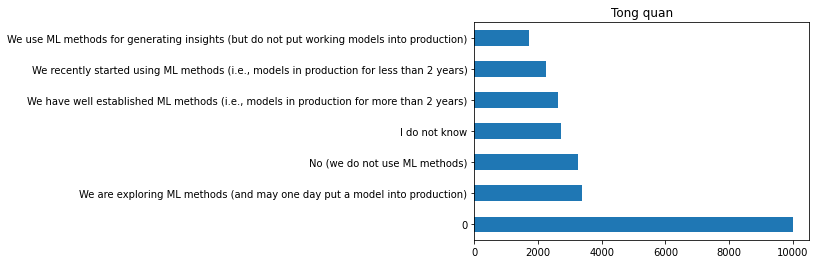

In [598]:
df[df.columns[22]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

In [600]:
df.columns[22]

'How employer incorporate machine learning methods into their business'

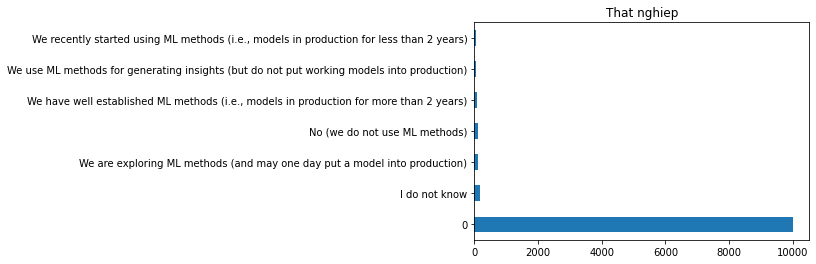

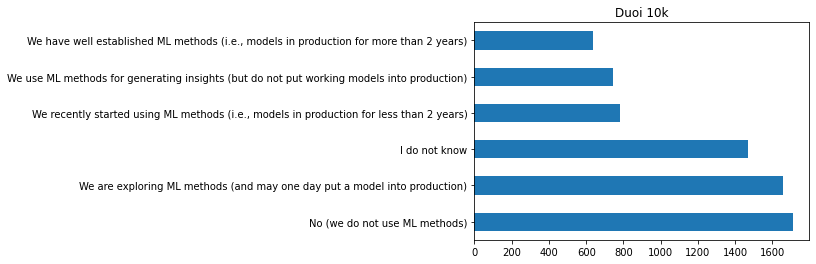

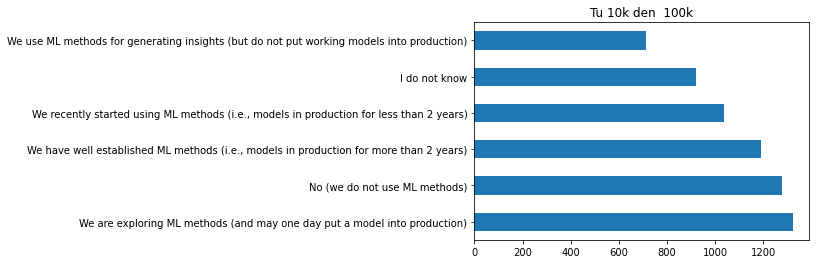

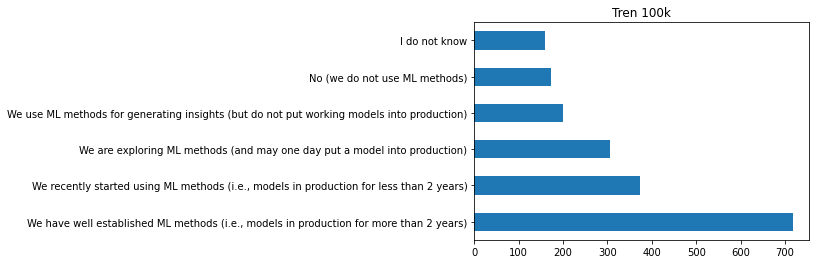

In [602]:
for i in range(len(dff)):
    dff[i]['How employer incorporate machine learning methods into their business'].value_counts().plot(kind = 'barh')
    plt.title(title[i])
    plt.show()

+ Đa số những người chịu trách nhiệm về mãng data science trong công ty đều trong giai đoạn đầu, chỉ mới nghiên cứu và chưa áp dụng Machine learning methods.
+ Với mức lương dưới 10 000 hầu như không biết hoặc chỉ đang nghiên cứu thêm các ML methods.
+ Với mức lương 10 000 đến 100 000 đô thì có những công ty chuẩn bị áp dụng ML method vào bussiness.
+ Với mức lương  100 000 thì đa số đều đã áp dụng thành công ML methods hoặc mới bắt đầu áp dụng.

### 23. Activities that make up an important part of role at work:

In [606]:
it = ['Analyze and understand data to influence product or business decisions', 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Build prototypes to explore applying machine learning to new areas', 'Build and/or run a machine learning service that operationally improves my product or workflows', 'Experimentation and iteration to improve existing ML models', 'Do research that advances the state of the art of machine learning', 'Other']

Text(0.5, 1.0, 'Tong quan')

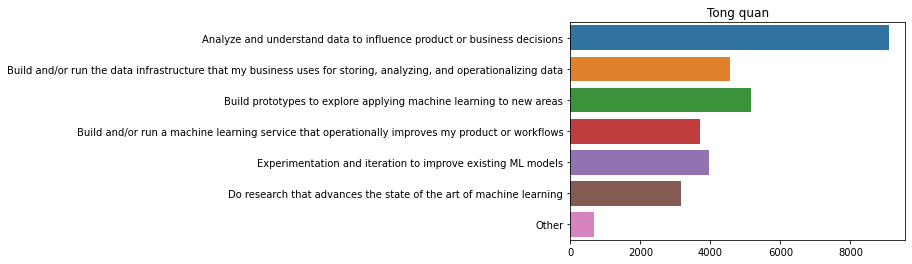

In [608]:
n = 23
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

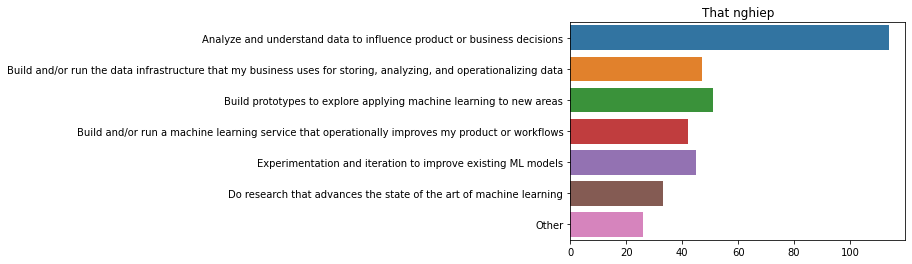

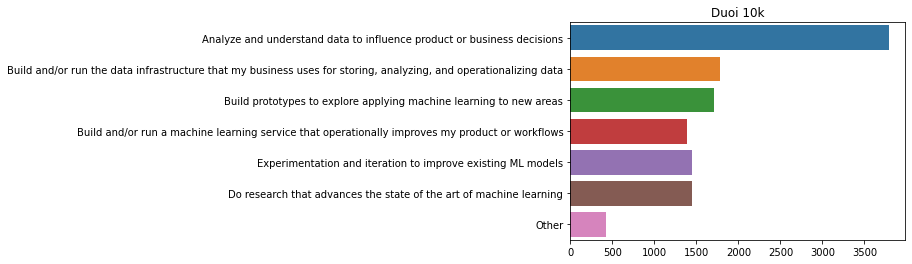

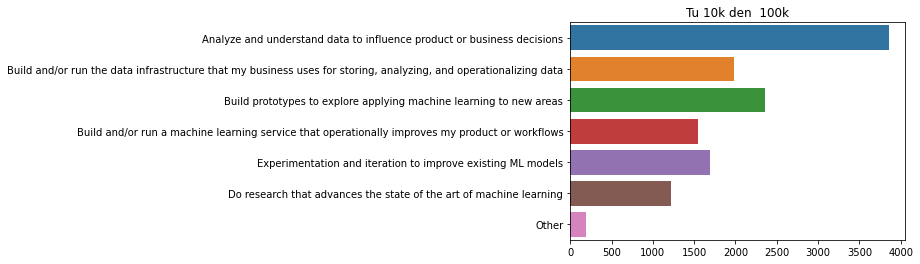

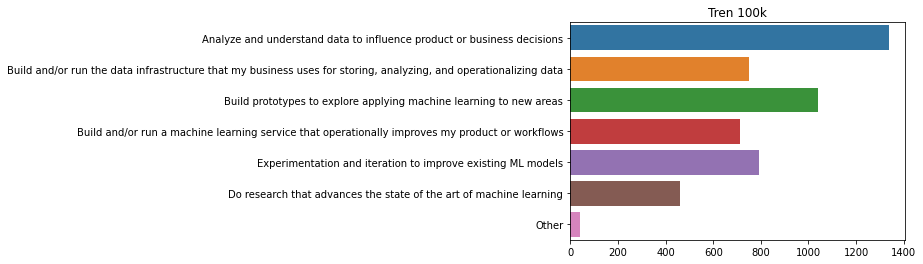

In [611]:
for i in range(len(dff)):
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[23]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])
    plt.show()

In [612]:
df.columns[23]

'Activities that make up an important part of role at work'

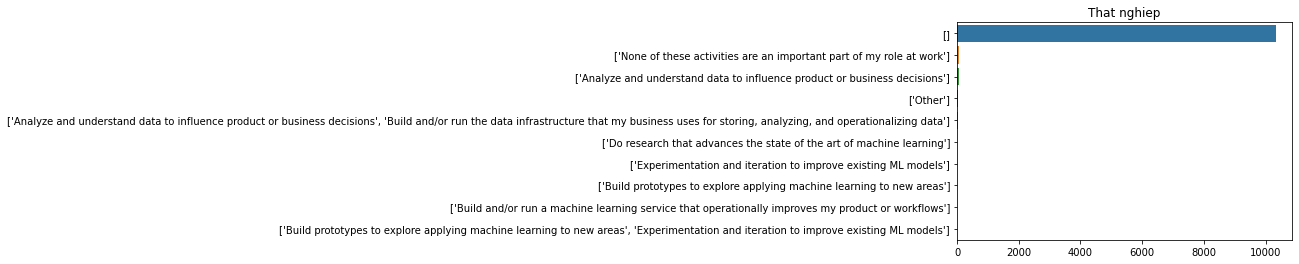

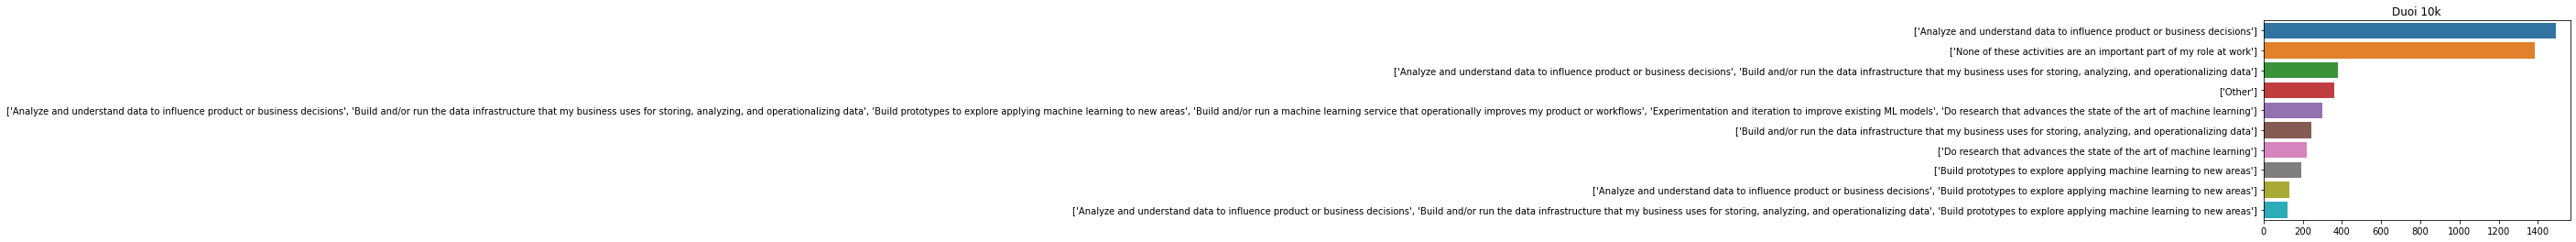

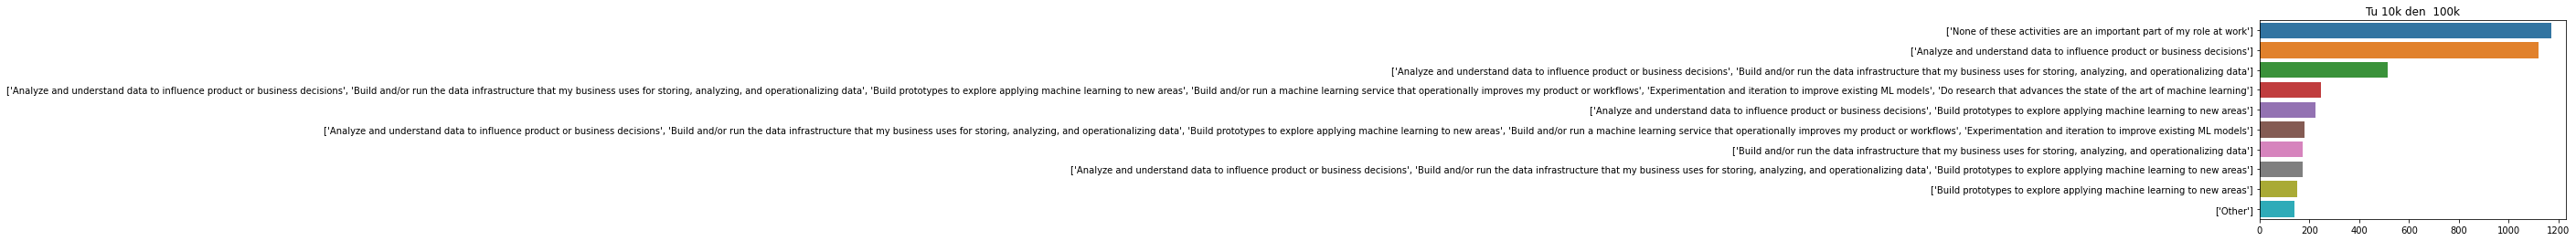

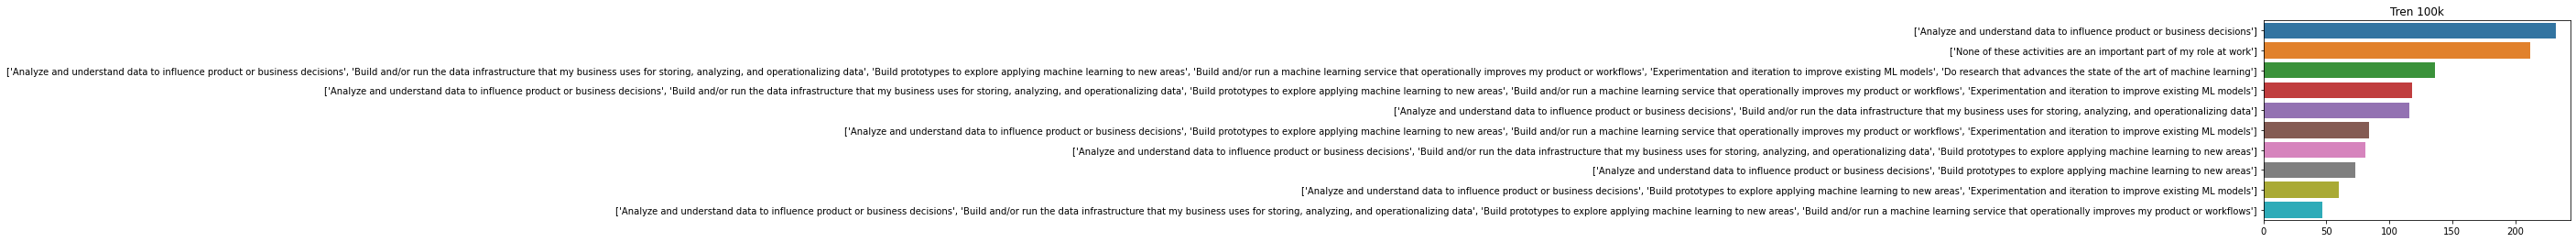

In [614]:
for i in range(len(dff)):
    Y = dff[i]['Activities that make up an important part of role at work'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Activities that make up an important part of role at work'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])
    plt.show()

+ Công việc phổ biến nhất là phân tích và hiểu dữ liệu phục vụ cho mục đích của công ty ở mọi mức lương. Ngoài ra còn có việc xây dựng, sửa chửa, vận hành bảo trì các cơ sở hạ tầng dữ liệu.
+ Lương càng cao càng thấy sự gia tăng của các nhiệm vụ: dựng prototype để explore applying machine learning to new area, cải thiện mô hình máy học hiện có, xây dựng ML servcie, nghiên cứu những công trình state of art của ML.

### 24. Yearly Compensation:

Text(0.5, 1.0, 'Tong quan')

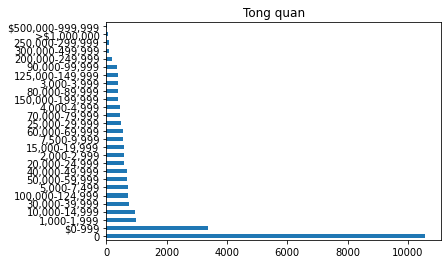

In [615]:
df[df.columns[24]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

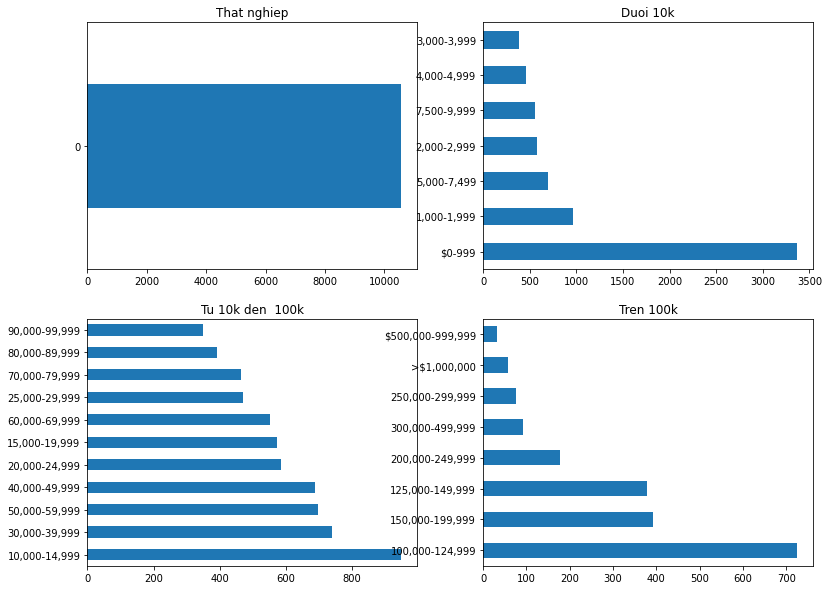

In [616]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i]['Yearly Compensation'].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Phần lớn là chưa có thu nhập
+ Trong nhóm dưới 10000 đô một năm thì đa số dưới 1000 đô một năm

### 25. Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate)?

In [618]:
df.columns[25]

'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'

Text(0.5, 1.0, 'Tong quan')

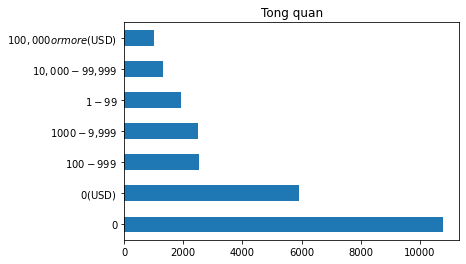

In [617]:
df[df.columns[25]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

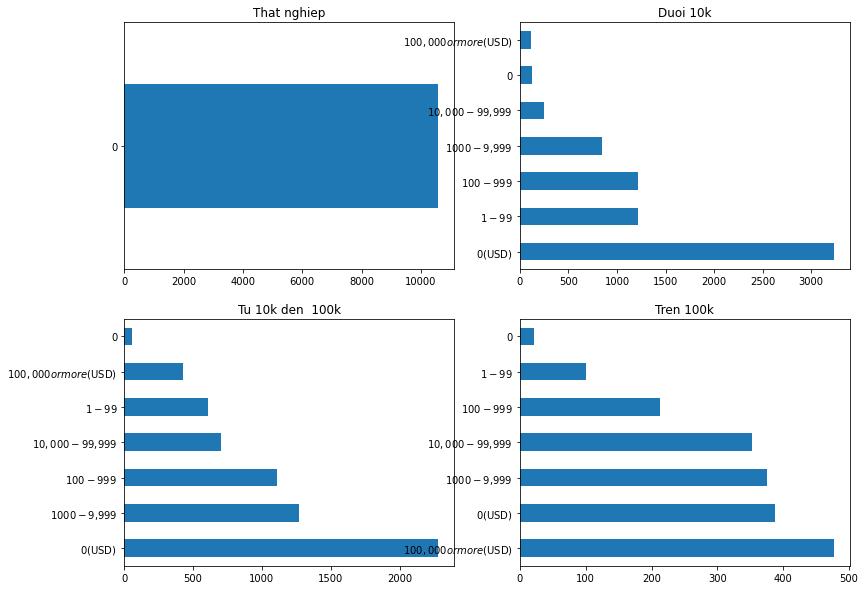

In [619]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i][df.columns[25]].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Đa số đều không chi trả cho các dịch vụ hỗ trợ.
+ Khoảng 1000 đến 10000 cho 5 năm với mức lương mỗi cá nhân 10 000 đến 100 000
+ Hơn 100 000 đô một năm với những công ty, cá nhân có mức lương trên 100 000 đô một năm
+ Đối với mỗi cá nhân chi khoảng 0.2% tối thiểu cho các dịch vụ.
+ Đối với tập thể team lớn, mức lương cao, chi trả nhiều hơn.

### 26. Cloud computing platforms

In [172]:
n = 26
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon Web Services (AWS) ', ' Microsoft Azure ', ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ', ' Oracle Cloud ', ' SAP Cloud ', ' Salesforce Cloud ', ' VMware Cloud ', ' Alibaba Cloud ', ' Tencent Cloud ']"]

In [620]:
it = [' Amazon Web Services (AWS) ', ' Microsoft Azure ', ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ', ' Oracle Cloud ', ' SAP Cloud ', ' Salesforce Cloud ', ' VMware Cloud ', ' Alibaba Cloud ', ' Tencent Cloud ']

Text(0.5, 1.0, 'Tong quan')

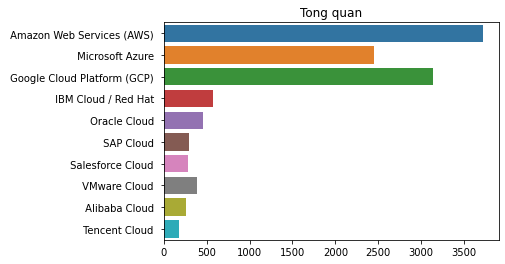

In [622]:
n = 26
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

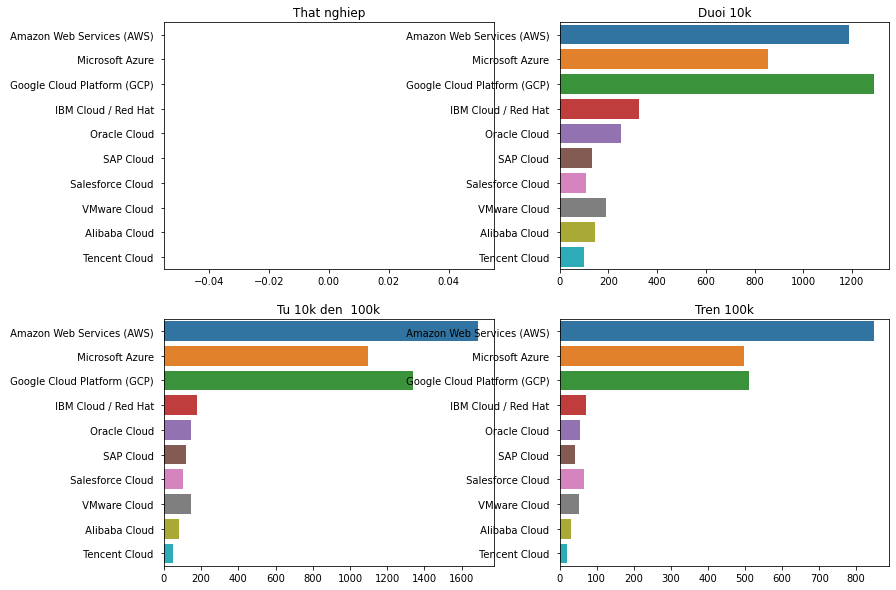

In [624]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[26]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [625]:
df.columns[26]

'Cloud computing platforms'

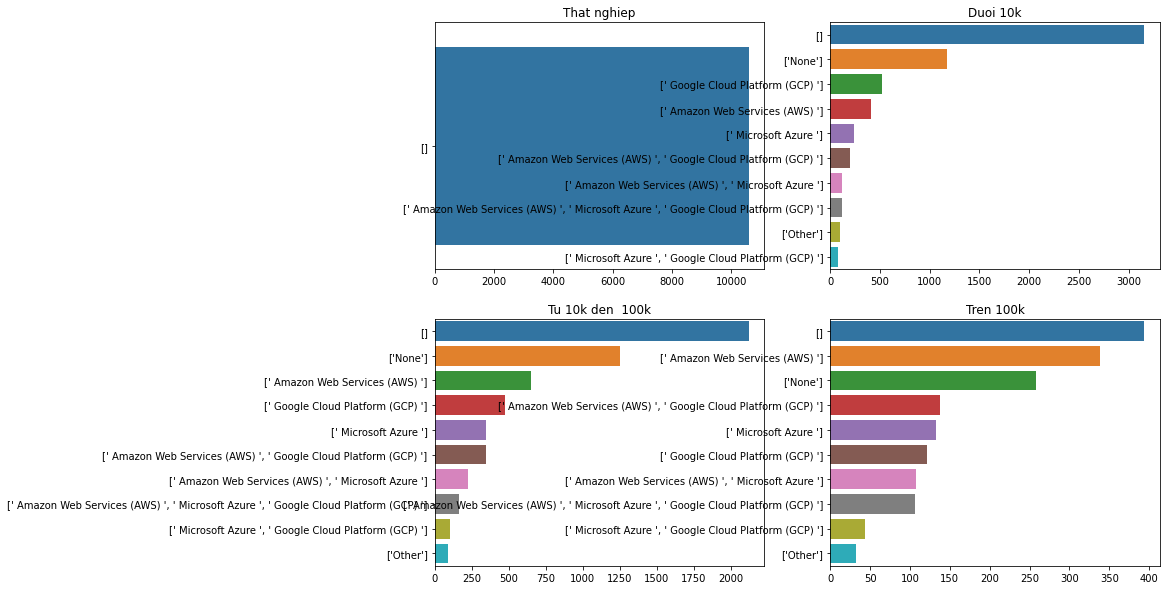

In [626]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Cloud computing platforms'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Cloud computing platforms'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ AWS là phổ biến nhất, ngoài ra còn có Google cloud platform và microsoft Azure.

### 27. Most enjoyable Cloud platforms:

Text(0.5, 1.0, 'Tong quan')

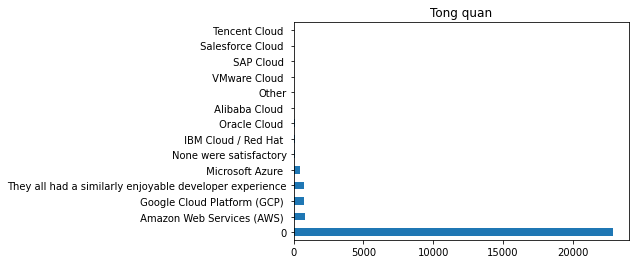

In [627]:
plt.figure(figsize = (6,4))
df[df.columns[27]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

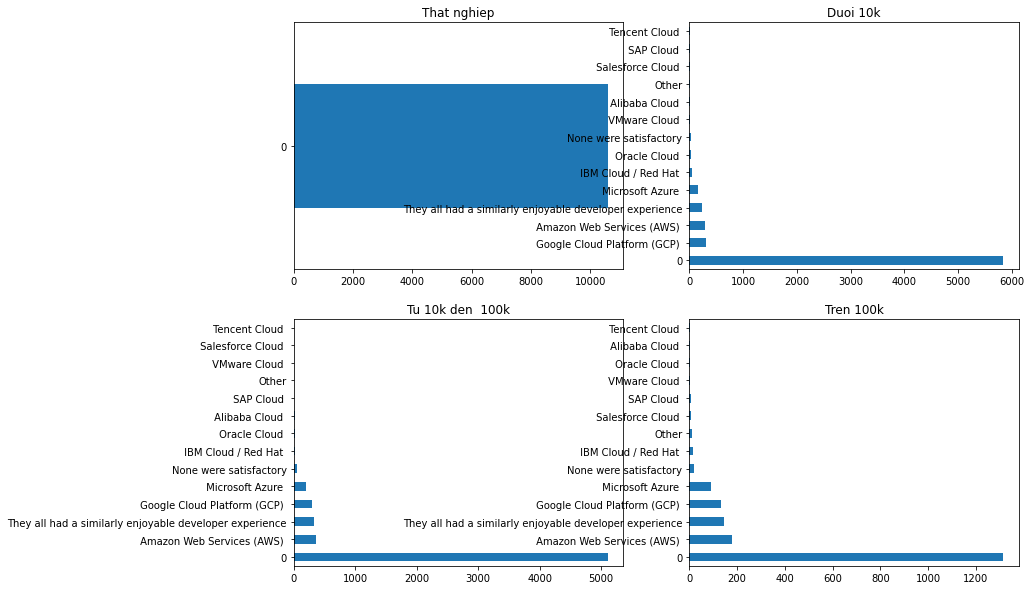

In [629]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i][df.columns[27]].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Một số thích AWS, một số khác nói rằng các platform đều có trải nghiệm như nhau.

### 28. Cloud computing products:

In [632]:
n = 28
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon Elastic Compute Cloud (EC2) ', ' Microsoft Azure Virtual Machines ', ' Google Cloud Compute Engine ', 'Other']"]

In [633]:
it  = [' Amazon Elastic Compute Cloud (EC2) ', ' Microsoft Azure Virtual Machines ', ' Google Cloud Compute Engine ', 'Other']

Text(0.5, 1.0, 'Tong quan')

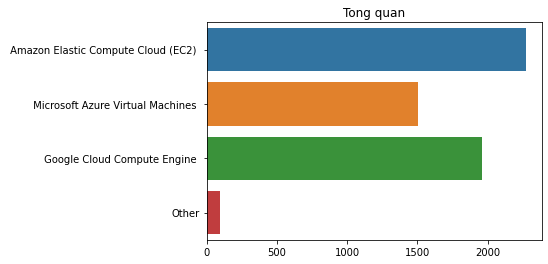

In [634]:
n = 28
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

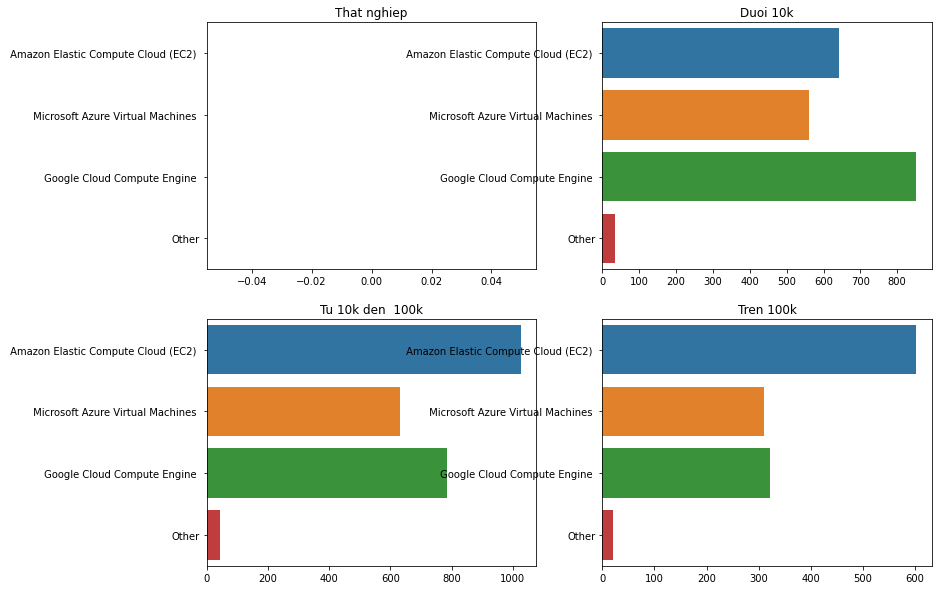

In [635]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[28]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

In [637]:
df.columns[28]

'Cloud computing products'

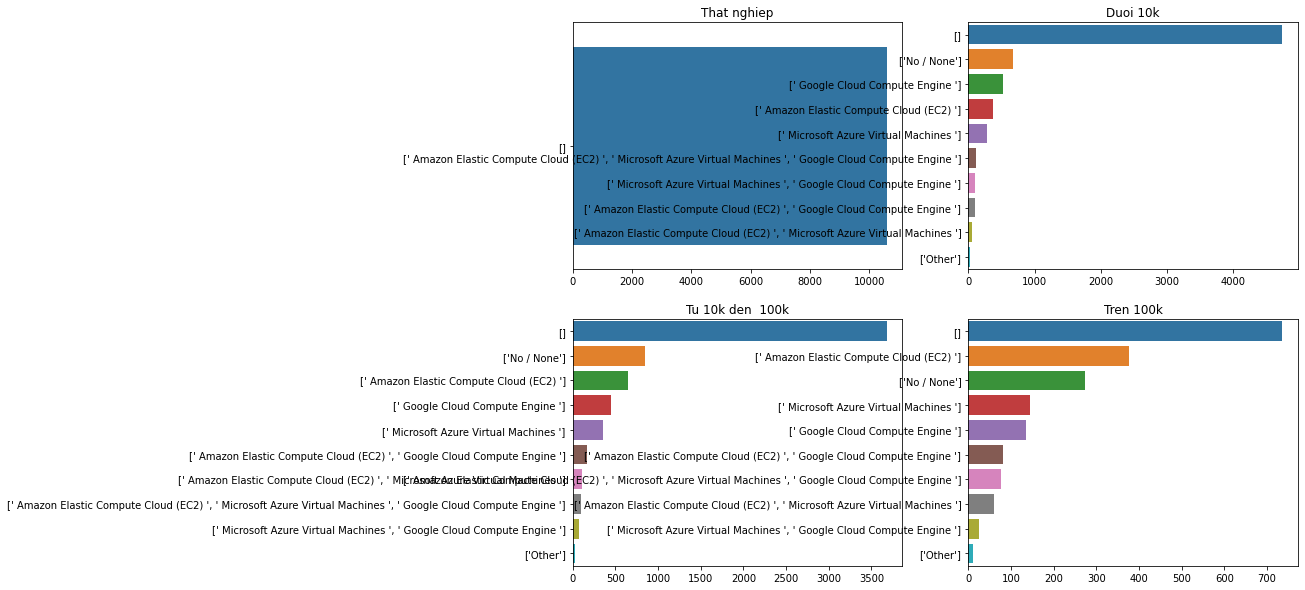

In [638]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i]['Cloud computing products'].value_counts().to_frame()[:10].index.to_list()
    X = dff[i]['Cloud computing products'].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Dưới 10000 đô thu nhập một năm phần nhiều là google cloud computing
+ Trên 10000 đô thu nhập một năm là EC2.

### 29.Data storage products :

In [642]:
n = 29
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Microsoft Azure Data Lake Storage ', 'Microsoft Azure Disk Storage ', ' Amazon Simple Storage Service (S3)  ', ' Amazon Elastic File System (EFS)  ', 'Google Cloud Storage (GCS)   ', ' Google Cloud Filestore ']"]

In [644]:
it  = ['Microsoft Azure Data Lake Storage ', 'Microsoft Azure Disk Storage ', ' Amazon Simple Storage Service (S3)  ', ' Amazon Elastic File System (EFS)  ', 'Google Cloud Storage (GCS)   ', ' Google Cloud Filestore ']

Text(0.5, 1.0, 'Tong quan')

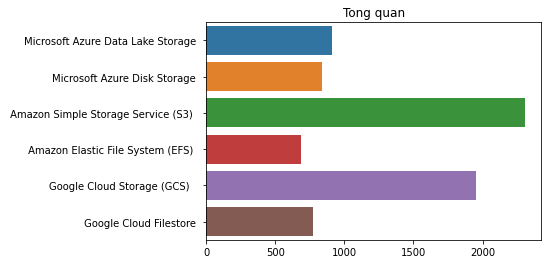

In [645]:
n = 29
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

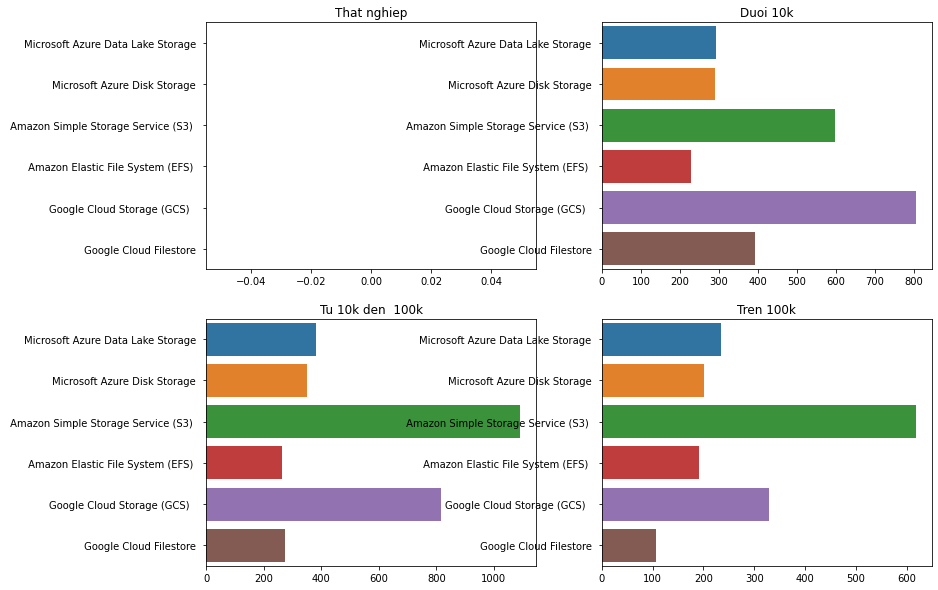

In [647]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[29]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

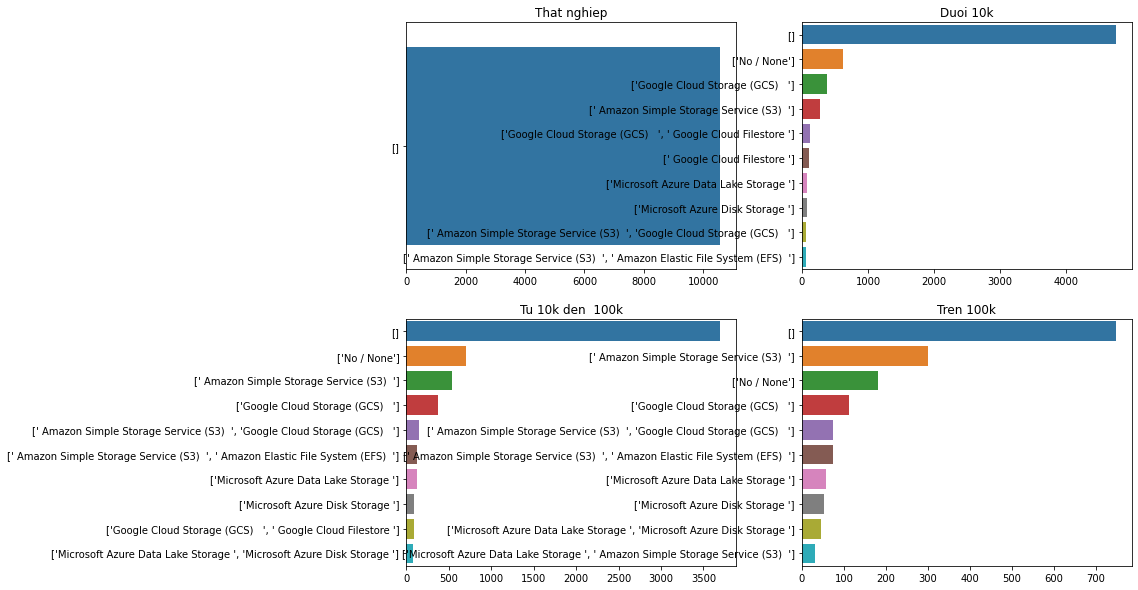

In [648]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i][df.columns[29]].value_counts().to_frame()[:10].index.to_list()
    X = dff[i][df.columns[29]].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Amazone web storage service (S3) và  Google cloud storage (GCS) là hai storage product thường được sử dụng nhất.

### 30.Managed machine learning products :

In [649]:
n = 30
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon SageMaker ', ' Azure Machine Learning Studio ', ' Google Cloud Vertex AI', ' DataRobot', ' Databricks', ' Dataiku', ' Alteryx', ' Rapidminer', 'Other']"]

In [650]:
it = [' Amazon SageMaker ', ' Azure Machine Learning Studio ', ' Google Cloud Vertex AI', ' DataRobot', ' Databricks', ' Dataiku', ' Alteryx', ' Rapidminer', 'Other']

Text(0.5, 1.0, 'Tong quan')

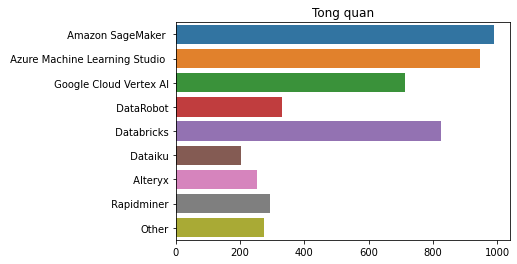

In [651]:
n = 30
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

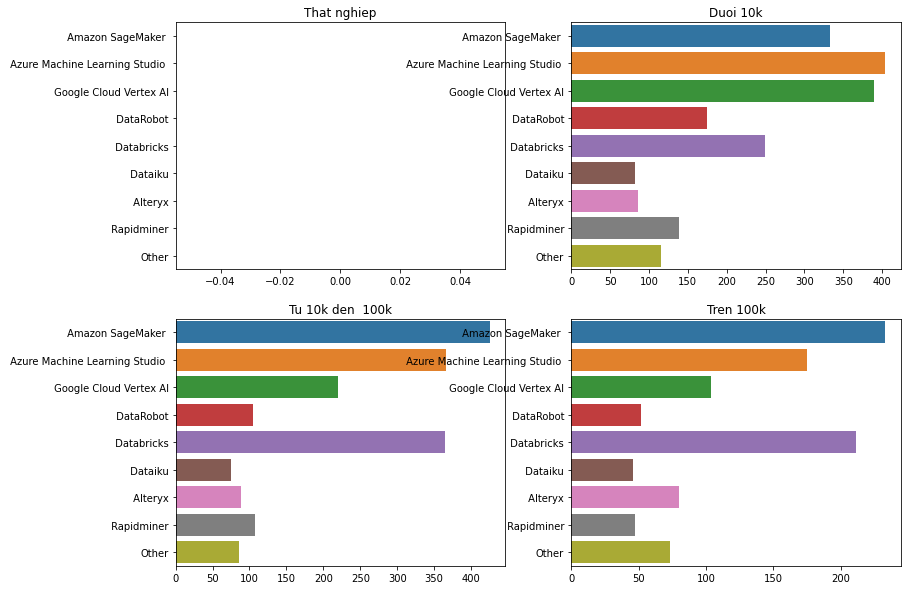

In [652]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[30]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

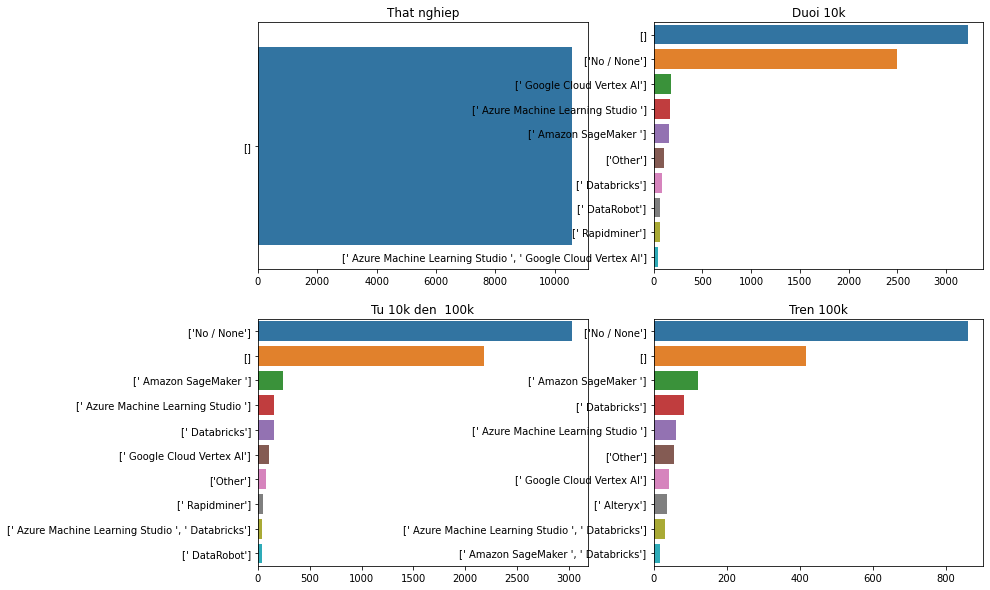

In [653]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i][df.columns[30]].value_counts().to_frame()[:10].index.to_list()
    X = dff[i][df.columns[30]].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Google Cloud Vetex AI phổ biến với mức lương thấp dưới 10 000 đô.
+ Amazone sagemaker, data bricks, azure machine learning studio là ba product phổ biến nhất

### 31.Big data products :

In [655]:
n = 31
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['MySQL ', 'PostgreSQL ', 'SQLite ', 'Oracle Database ', 'MongoDB ', 'Snowflake ', 'IBM Db2 ', 'Microsoft SQL Server ', 'Microsoft Azure SQL Database ', 'Microsoft Azure Cosmos DB ', 'Amazon Redshift ', 'Amazon Aurora ', 'Amazon RDS ', 'Amazon DynamoDB ', 'Google Cloud BigQuery ', 'Google Cloud SQL ', 'Google Cloud Firestore ', 'Google Cloud BigTable ', 'Google Cloud Spanner ']"]

In [657]:
it = ['MySQL ', 'PostgreSQL ', 'SQLite ', 'Oracle Database ', 'MongoDB ', 'Snowflake ', 'IBM Db2 ', 'Microsoft SQL Server ', 'Microsoft Azure SQL Database ', 'Microsoft Azure Cosmos DB ', 'Amazon Redshift ', 'Amazon Aurora ', 'Amazon RDS ', 'Amazon DynamoDB ', 'Google Cloud BigQuery ', 'Google Cloud SQL ', 'Google Cloud Firestore ', 'Google Cloud BigTable ', 'Google Cloud Spanner ']

Text(0.5, 1.0, 'Tong quan')

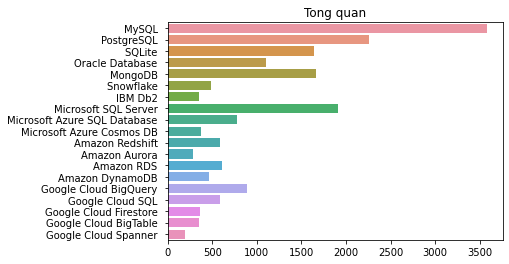

In [658]:
n = 31
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

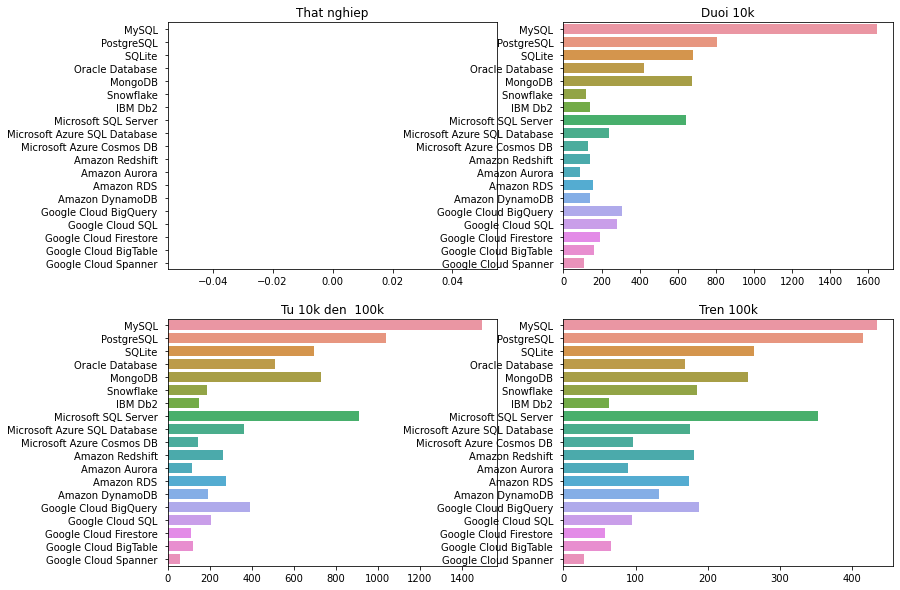

In [660]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[31]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ MySQL, PostgreSQL and Microsoft SQL Server là ba big data product được ưa chuộng nhất.

### 32.Most often using Big data products :

Text(0.5, 1.0, 'Tong quan')

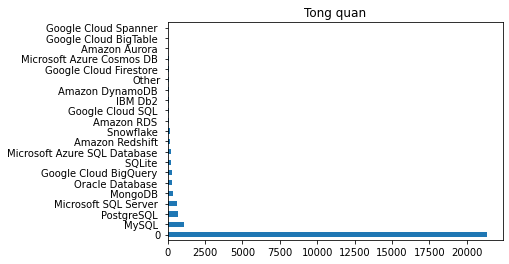

In [664]:
df[df.columns[32]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

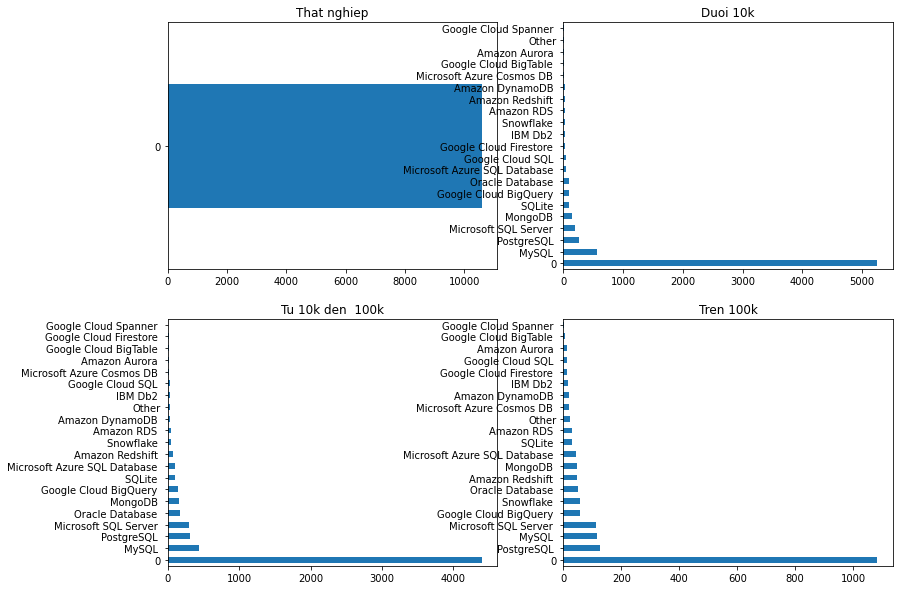

In [665]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i][df.columns[32]].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Trong đó, My SQL được sử dụng thường xuyên nhất.

### 33.Business intelligence tools :

In [666]:
n = 33
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 'Tableau CRM', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx ', 'Sisense ', 'SAP Analytics Cloud ', 'Microsoft Azure Synapse ', 'Thoughtspot ']"]

In [667]:
it = ['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 'Tableau CRM', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx ', 'Sisense ', 'SAP Analytics Cloud ', 'Microsoft Azure Synapse ', 'Thoughtspot ']

Text(0.5, 1.0, 'Tong quan')

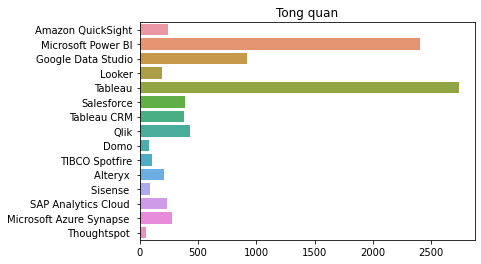

In [668]:
n = 33
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

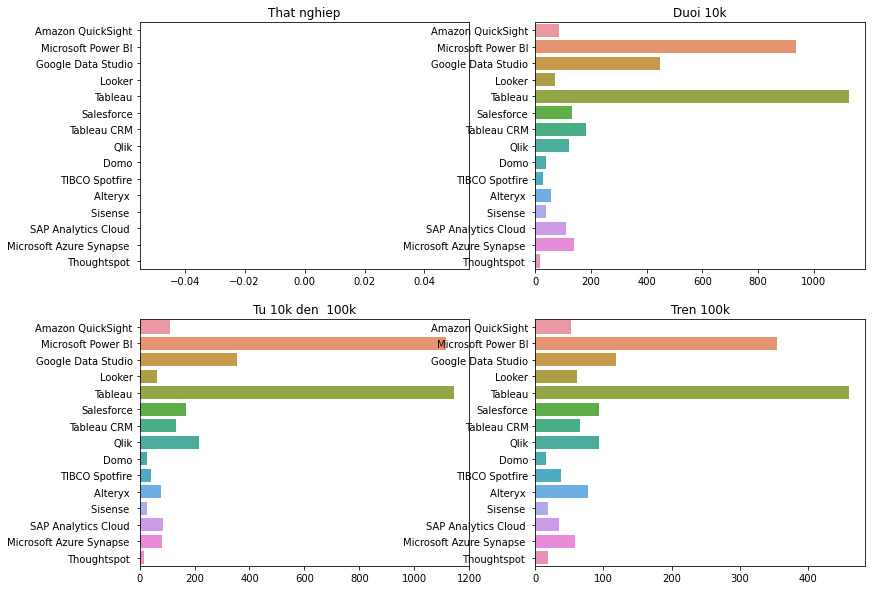

In [669]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[33]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

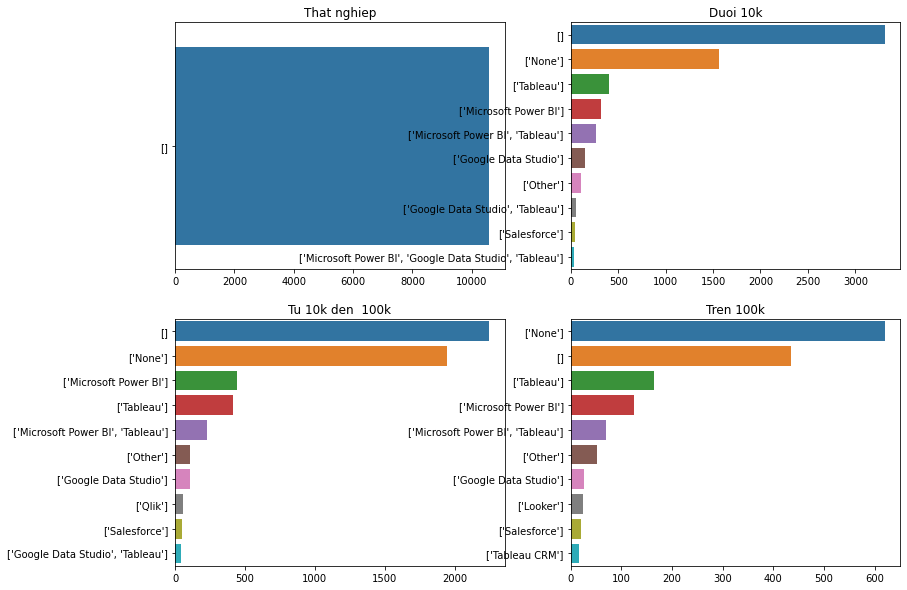

In [670]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    Y = dff[i][df.columns[33]].value_counts().to_frame()[:10].index.to_list()
    X = dff[i][df.columns[33]].value_counts().to_frame()[:10].values.flatten().tolist()
    sns.barplot(x = X, y = Y,orient = "h")
    plt.title(title[i])

+ Hai business intelligent tools phổ biến nhất là Tableu và Power BI

### 34.Most often business intelligence tools :

Text(0.5, 1.0, 'Tong quan')

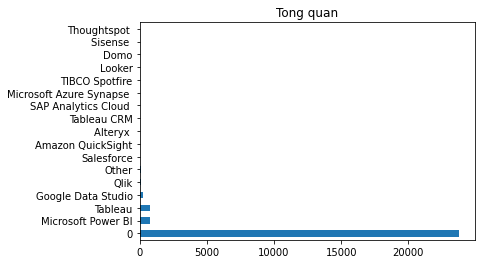

In [673]:
df[df.columns[34]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

+ Cả hai được sử dụng với mức độ như nhau.

### 35.Automated machine learning tools :

In [674]:
n = 35
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Automated data augmentation (e.g. imgaug, albumentations)', 'Automated feature engineering/selection (e.g. tpot, boruta_py)', 'Automated model selection (e.g. auto-sklearn, xcessiv)', 'Automated model architecture searches (e.g. darts, enas)', 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)', 'Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)', 'Other']"]

In [676]:
it = ['Automated data augmentation (e.g. imgaug, albumentations)', 'Automated feature engineering/selection (e.g. tpot, boruta_py)', 'Automated model selection (e.g. auto-sklearn, xcessiv)', 'Automated model architecture searches (e.g. darts, enas)', 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)', 'Automation of full ML pipelines (e.g. Google AutoML, H2O Driverless AI)', 'Other']

Text(0.5, 1.0, 'Tong quan')

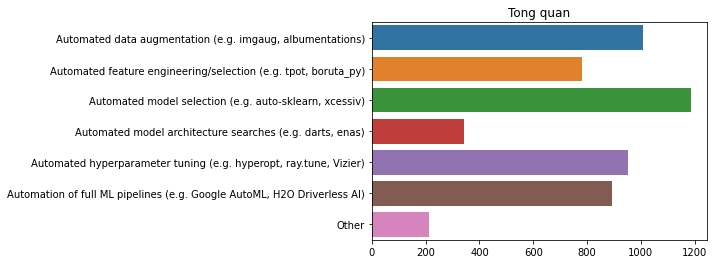

In [677]:
n = 35
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

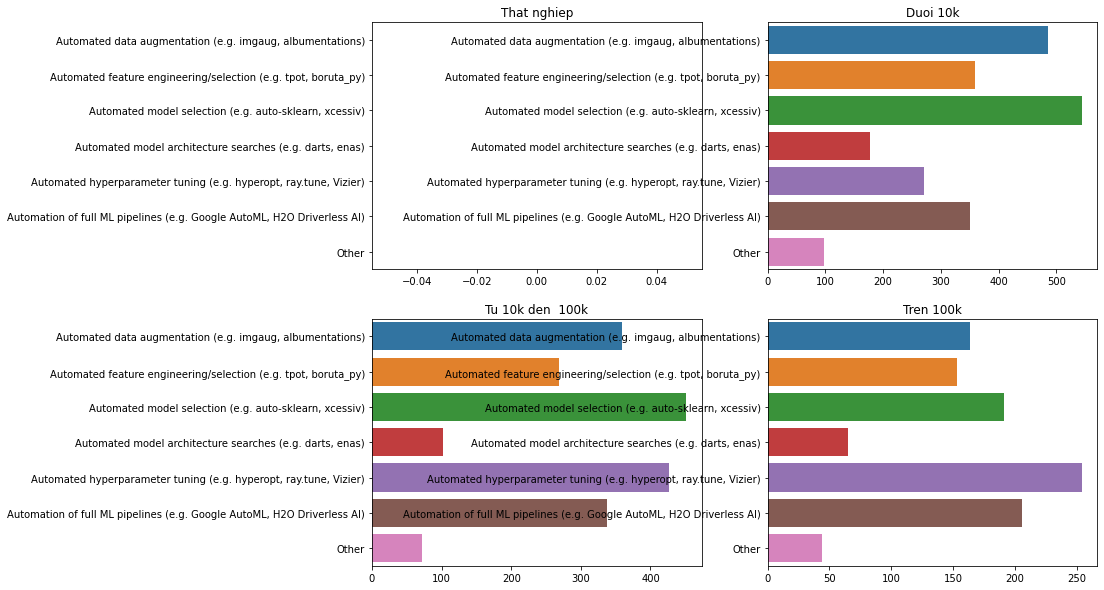

In [679]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[35]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ Data augmentation, hyperparameter tuning và model selection là các tool tự động phổ biến
+ Với mức lương dưới 10000 đô một năm: thường sử dụng các tools model selection và data augmentation(nhiều nhất)
+ Với mức lương 10000 đến  10000: hyperparameter tuning, model selection (nhiều nhất) và full auto ML pipeline
+ Với mức lương  trên 10000: người ta ít sử dụng model selection chỉ còn hyperparameter tuning(nhiều nhất) và full ML pipeline

### 36.Automated machine learning tools pt2 :

In [680]:
n = 36
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Google Cloud AutoML ', ' H2O Driverless AI  ', ' Databricks AutoML ', ' DataRobot AutoML ', '  Amazon Sagemaker Autopilot ', '  Azure Automated Machine Learning ']"]

In [681]:
it = [' Google Cloud AutoML ', ' H2O Driverless AI  ', ' Databricks AutoML ', ' DataRobot AutoML ', '  Amazon Sagemaker Autopilot ', '  Azure Automated Machine Learning ']

Text(0.5, 1.0, 'Tong quan')

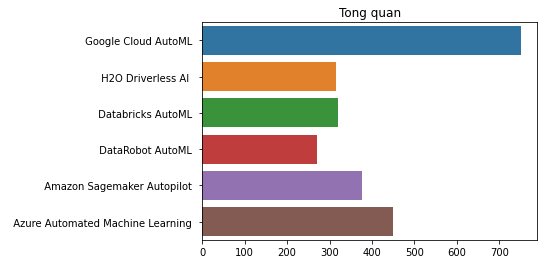

In [683]:
n = 36
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

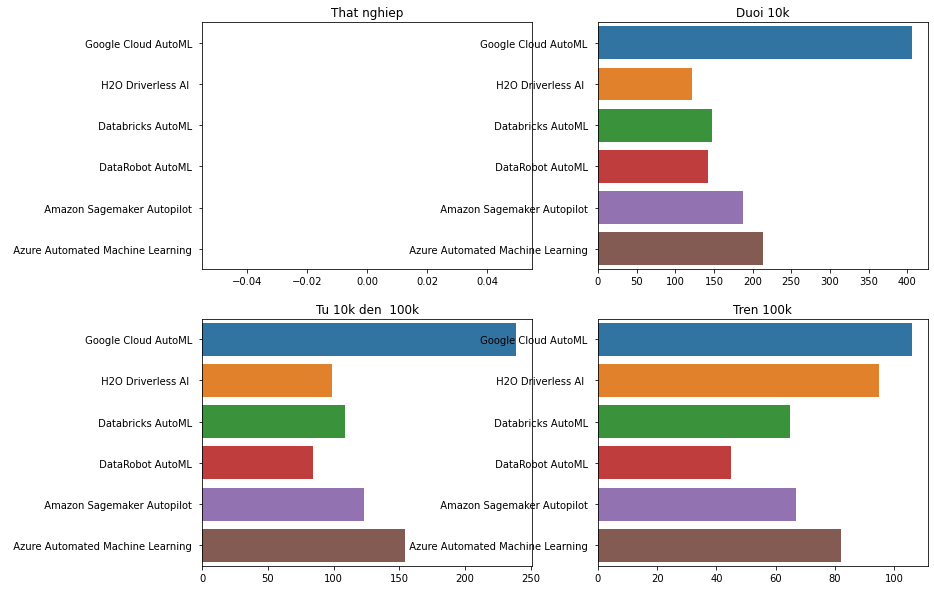

In [685]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[36]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ Google Cloud AutoML là ML automation tool được sử dụng nhiều nhất. Azure automated machine learning tool cũng rất được ưa chuộng.

### 37.Tools to help manage ML experiments :

In [686]:
n = 37
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Neptune.ai ', ' Weights & Biases ', ' Comet.ml ', ' Sacred + Omniboard ', ' TensorBoard ', ' Guild.ai ', ' Polyaxon ', ' ClearML ', ' Domino Model Monitor ', ' MLflow ']"]

In [687]:
it = [' Neptune.ai ', ' Weights & Biases ', ' Comet.ml ', ' Sacred + Omniboard ', ' TensorBoard ', ' Guild.ai ', ' Polyaxon ', ' ClearML ', ' Domino Model Monitor ', ' MLflow ']

Text(0.5, 1.0, 'Tong quan')

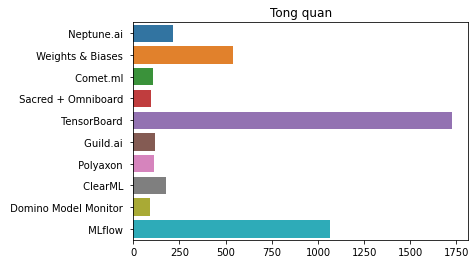

In [688]:
n = 37
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

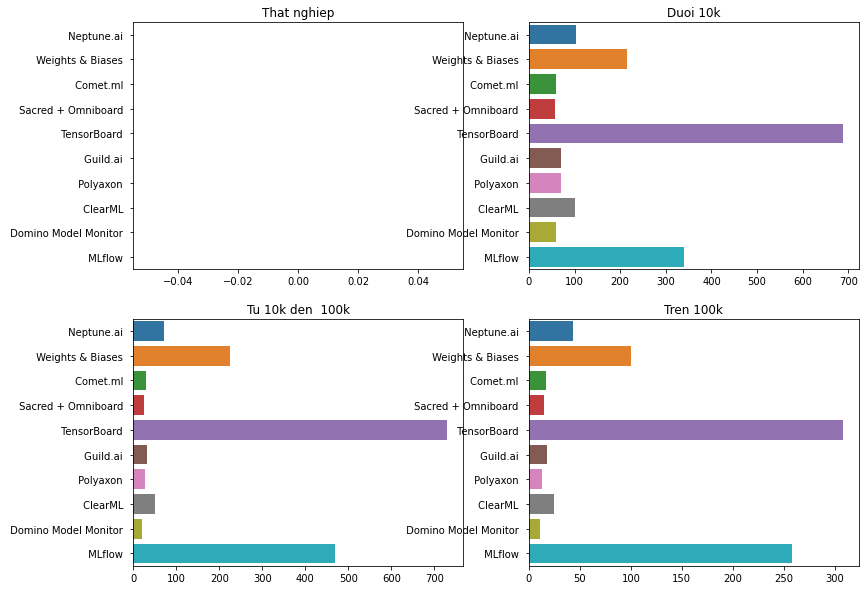

In [690]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[37]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ Đa số đều ưa chuộng TensorBoard hoặc MLflow

### 38.Where publicly applications :

In [691]:
n = 38
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Plotly Dash ', ' Streamlit ', ' NBViewer ', ' GitHub ', ' Personal blog ', ' Kaggle ', ' Colab ', ' Shiny ']"]

In [693]:
it = [' Plotly Dash ', ' Streamlit ', ' NBViewer ', ' GitHub ', ' Personal blog ', ' Kaggle ', ' Colab ', ' Shiny ']

Text(0.5, 1.0, 'Tong quan')

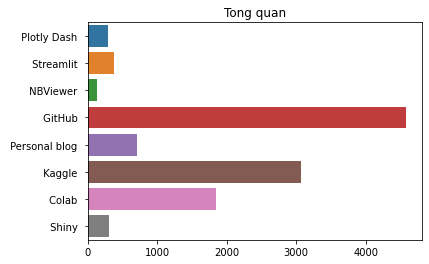

In [694]:
n = 38
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

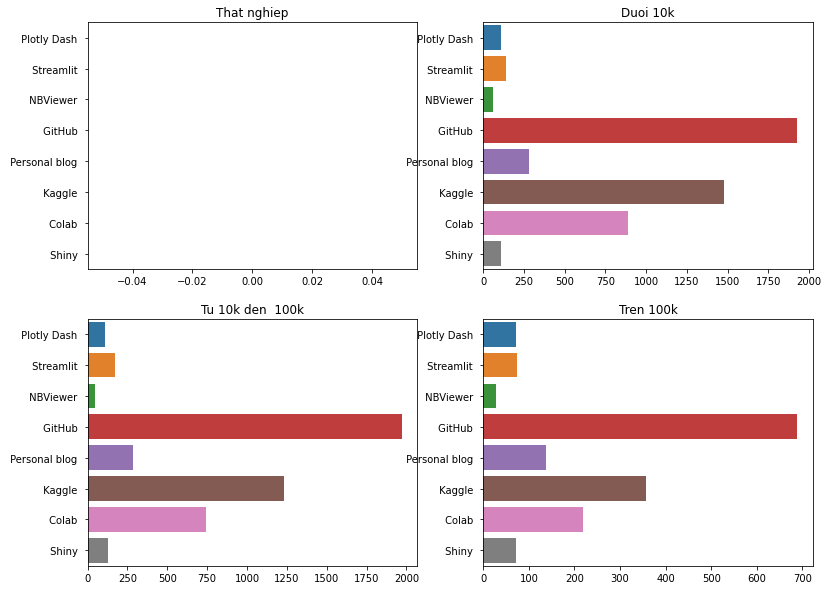

In [695]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[38]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ GitHub, Kaggle and Colab rất được ưa dùng, Github dùng nhiều nhất.

### 39. Courses Platform :

In [696]:
n = 39
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)', 'University Courses (resulting in a university degree)', 'Other']"]

In [697]:
it = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)', 'University Courses (resulting in a university degree)', 'Other']

Text(0.5, 1.0, 'Tong quan')

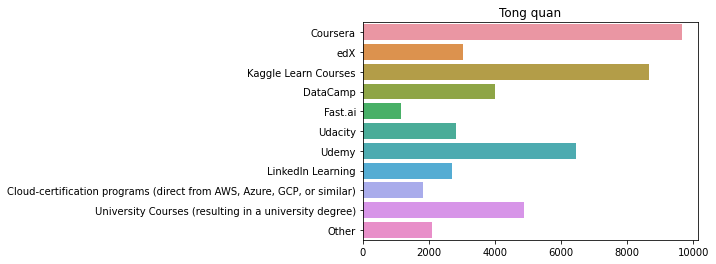

In [698]:
n = 39
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

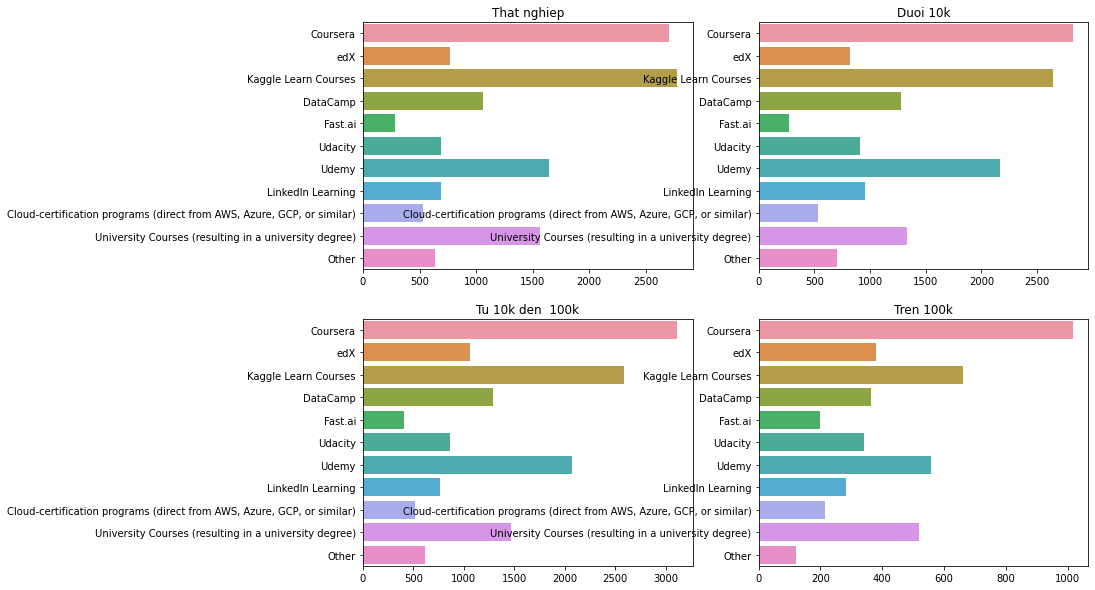

In [700]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    count = [0 for i in range(len(it))]
    for _ in dff[i][df.columns[39]]:
        for ii in range(len(it)):
            if it[ii] in _:
                count[ii] = count[ii] + 1
    

    sns.barplot(y = it, x = count, orient = "h")
    plt.title(title[i])

+ Những khóa học trên Coursera, Kaggle Learn and Udemy thường được lựa chọn nhiều.

### 40.Primary tool to analyze data : 

Text(0.5, 1.0, 'Tong quan')

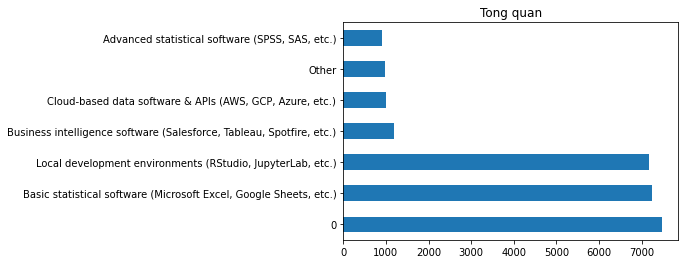

In [702]:
df[df.columns[40]].value_counts().plot(kind = 'barh')
plt.title('Tong quan')

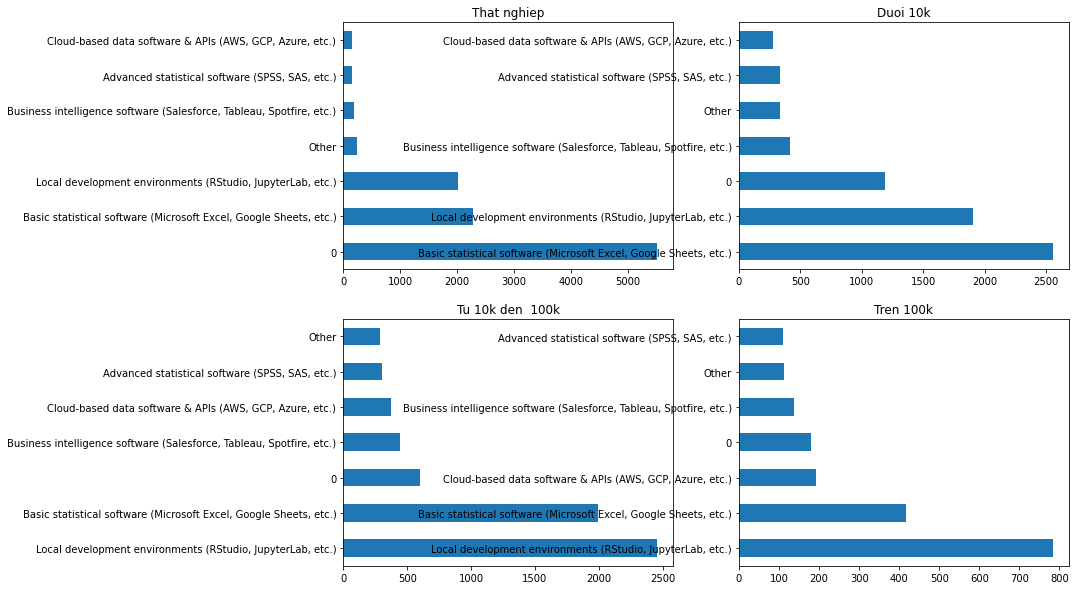

In [703]:
f, axs = plt.subplots(2,2,figsize=(13,10))
for i in range(len(dff)):
    plt.subplot(2,2,i+1)
    dff[i][df.columns[40]].value_counts().plot(kind = 'barh')
    plt.title(title[i])

+ Để phân tích dữ liệu thì họ thường sử dụng R studio. Jupyter Lab hoặc những phần mềm cơ bản (Excel, Google Sheet,..)

### 41.Favorite media sources that report on data science topics :

In [712]:
df[df.columns[41]].value_counts()[:5]

[]                                                                                                                                                  7644
['Kaggle (notebooks, forums, etc)']                                                                                                                 1224
['Kaggle (notebooks, forums, etc)', 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)']                                                           1212
['None']                                                                                                                                            1007
['Kaggle (notebooks, forums, etc)', 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)', 'Blogs (Towards Data Science, Analytics Vidhya, etc)']     939
Name: Favorite media sources that report on data science topics, dtype: int64

+ Đa số thường tìm kiếm thông tin trên kaggle,  youtube hoặc blog.

### 42.Cloud computing platforms hope to become more familiar with in the next 2 years :

In [714]:
n = 42
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon Web Services (AWS) ', ' Microsoft Azure ', ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ', ' Oracle Cloud ', ' SAP Cloud ', ' VMware Cloud ', ' Salesforce Cloud ', ' Alibaba Cloud ', ' Tencent Cloud ', 'Other']"]

In [715]:
it = [' Amazon Web Services (AWS) ', ' Microsoft Azure ', ' Google Cloud Platform (GCP) ', ' IBM Cloud / Red Hat ', ' Oracle Cloud ', ' SAP Cloud ', ' VMware Cloud ', ' Salesforce Cloud ', ' Alibaba Cloud ', ' Tencent Cloud ', 'Other']

Text(0.5, 1.0, 'Tong quan')

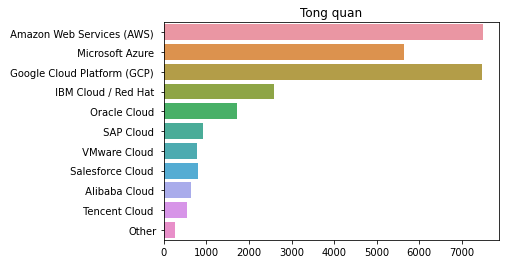

In [716]:
n = 42
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

+ Ba cloud computing platform hot nhất cũng có nhu cầu học cao nhất.

### 43.Cloud computing products hope to become more familiar with in the next 2 years :

In [718]:
n = 43
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon Elastic Compute Cloud (EC2) ', ' Microsoft Azure Virtual Machines ', ' Google Cloud Compute Engine ', 'Other']"]

In [719]:
it = [' Amazon Elastic Compute Cloud (EC2) ', ' Microsoft Azure Virtual Machines ', ' Google Cloud Compute Engine ', 'Other']

Text(0.5, 1.0, 'Tong quan')

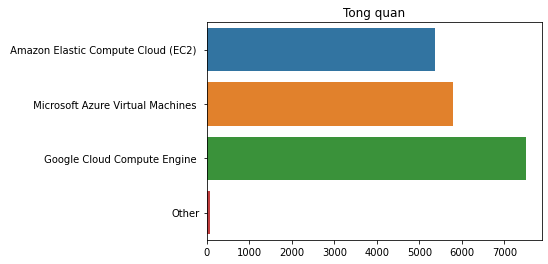

In [720]:
n = 43
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 44.Managed machine learning products hope to become more familiar with in the next 2 years :

In [721]:
n = 44
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Amazon SageMaker ', ' Azure Machine Learning Studio ', ' Google Cloud Vertex AI', ' DataRobot', ' Databricks', ' Dataiku', ' Alteryx', ' Rapidminer', 'Other']"]

In [722]:
it = [' Amazon SageMaker ', ' Azure Machine Learning Studio ', ' Google Cloud Vertex AI', ' DataRobot', ' Databricks', ' Dataiku', ' Alteryx', ' Rapidminer', 'Other']

Text(0.5, 1.0, 'Tong quan')

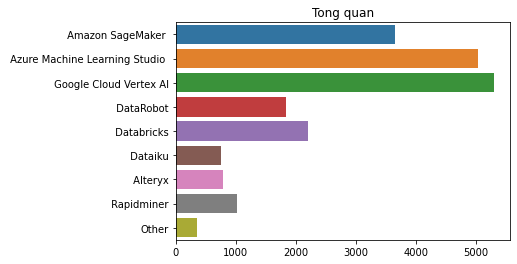

In [723]:
n = 44
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 45.Big data products hope to become more familiar with in the next 2 years :

In [724]:
n = 45
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['MySQL ', 'PostgreSQL ', 'SQLite ', 'Oracle Database ', 'MongoDB ', 'Snowflake ', 'IBM Db2 ', 'Microsoft SQL Server ', 'Microsoft Azure SQL Database ', 'Microsoft Azure Cosmos DB ', 'Amazon Redshift ', 'Amazon Aurora ', 'Amazon DynamoDB ', 'Amazon RDS ', 'Google Cloud BigQuery ', 'Google Cloud SQL ', 'Google Cloud Firestore ', 'Google Cloud BigTable ', 'Google Cloud Spanner ', 'Other']"]

In [725]:
it = ['MySQL ', 'PostgreSQL ', 'SQLite ', 'Oracle Database ', 'MongoDB ', 'Snowflake ', 'IBM Db2 ', 'Microsoft SQL Server ', 'Microsoft Azure SQL Database ', 'Microsoft Azure Cosmos DB ', 'Amazon Redshift ', 'Amazon Aurora ', 'Amazon DynamoDB ', 'Amazon RDS ', 'Google Cloud BigQuery ', 'Google Cloud SQL ', 'Google Cloud Firestore ', 'Google Cloud BigTable ', 'Google Cloud Spanner ', 'Other']

Text(0.5, 1.0, 'Tong quan')

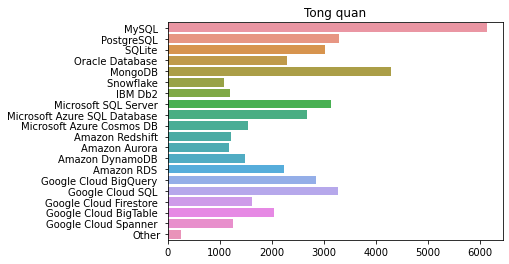

In [726]:
n = 45
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 46.Business intelligence tools hope to become more familiar with in the next 2 years :

In [727]:
n = 46
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Microsoft Power BI', 'Amazon QuickSight', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 'Tableau CRM', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx ', 'Sisense ', 'SAP Analytics Cloud ', 'Microsoft Azure Synapse ', 'Thoughtspot ', 'Other']"]

In [729]:
it  = ['Microsoft Power BI', 'Amazon QuickSight', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce', 'Tableau CRM', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx ', 'Sisense ', 'SAP Analytics Cloud ', 'Microsoft Azure Synapse ', 'Thoughtspot ', 'Other']

Text(0.5, 1.0, 'Tong quan')

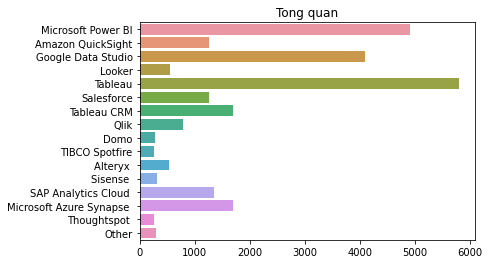

In [730]:
n = 46
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 47.Categories of automated machine learning tools hope to become more familiar with in the next 2 years :

In [731]:
n = 47
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["['Automated data augmentation (e.g. imgaug, albumentations)', 'Automated feature engineering/selection (e.g. tpot, boruta_py)', 'Automated model selection (e.g. auto-sklearn, xcessiv)', 'Automated model architecture searches (e.g. darts, enas)', 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)', 'Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI)', 'Other']"]

In [732]:
it = ['Automated data augmentation (e.g. imgaug, albumentations)', 'Automated feature engineering/selection (e.g. tpot, boruta_py)', 'Automated model selection (e.g. auto-sklearn, xcessiv)', 'Automated model architecture searches (e.g. darts, enas)', 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)', 'Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI)', 'Other']

Text(0.5, 1.0, 'Tong quan')

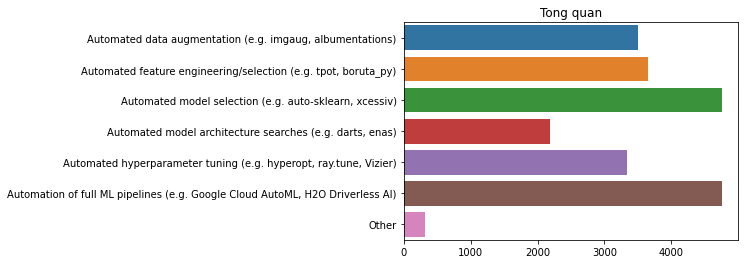

In [733]:
n = 47
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 48.Specific automated machine learning tools machine learning tools hope to become more familiar with in the next 2 years :

In [734]:
n = 48
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Google Cloud AutoML ', ' H2O Driverless AI  ', ' Databricks AutoML ', ' DataRobot AutoML ', '  Amazon Sagemaker Autopilot ', '  Azure Automated Machine Learning ', 'Other']"]

In [735]:
it = [' Google Cloud AutoML ', ' H2O Driverless AI  ', ' Databricks AutoML ', ' DataRobot AutoML ', '  Amazon Sagemaker Autopilot ', '  Azure Automated Machine Learning ', 'Other']

Text(0.5, 1.0, 'Tong quan')

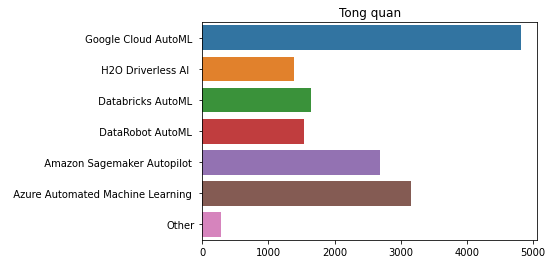

In [737]:
n = 48
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')

### 49.Tools for managing ML experiments hope to become more familiar with in the next 2 years :

In [738]:
n = 49
maxx = max([len(x) for x in df[df.columns[n]].unique()])
[x for x in df[df.columns[n]].unique() if len(x) == maxx]

["[' Neptune.ai ', ' Weights & Biases ', ' Comet.ml ', ' Sacred + Omniboard ', ' TensorBoard ', ' Guild.ai ', ' Polyaxon ', ' ClearML ', ' Domino Model Monitor ', ' MLflow ', 'Other']"]

In [739]:
it = [' Neptune.ai ', ' Weights & Biases ', ' Comet.ml ', ' Sacred + Omniboard ', ' TensorBoard ', ' Guild.ai ', ' Polyaxon ', ' ClearML ', ' Domino Model Monitor ', ' MLflow ', 'Other']

Text(0.5, 1.0, 'Tong quan')

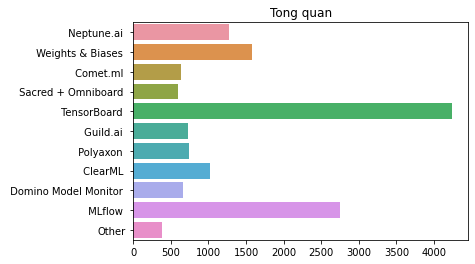

In [740]:
n = 49
feature = df.columns[n]
count = [0 for i in range(len(it))]


for _ in df[feature]:
    for i in range(len(it)):
        if it[i] in _:
            count[i] = count[i] + 1

plt.figure(figsize=(6,4))
sns.barplot(y = it, x = count, orient = "h")
plt.title('Tong quan')